# Tumor Classification with Neural Network Model

# Dataset Metadata

## Description
Dataset contains various features computed after analyzing digitized image of a fine needle aspirate (FNA) of **breast tumor mass**.\
The features describe characteristics of the cell nuclei present in the image.

Further details can be found from [this](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=1F6A8AD637499F8A8920E962E72740B8?sequence=1) paper which first introduced this approach and dataset.


## Features Available
1. **mean radius**: mean of distances from center to points on the perimeter
2. **mean texture**: variance of gray-scale values
3. **mean perimeter**: mean size of the core tumor
4. **mean area**
5. **mean smoothness**: mean of local variation in radius lengths
6. **mean compactness**: mean of compactness ($\frac{perimeter^2}{area}$)
7. **mean concavity**: mean of severity of concave portions of the contour
8. **mean concave points**: mean for number of concave portions of the contour
9. **mean symmetry**
10. **mean fractal dimension**: mean of complexity or irregularity of shape of tumor
11. **radius error**: standard error for the mean of distances from center to points on the perimeter
12. **texture error**: standard error for standard deviation of gray-scale values
13. **perimeter error**: standard error for mean size of core tumor
14. **area error**: standard error for mean area of tumor
15. **smoothness error**: standard error for local variation in radius lengths
16. **compactness error**: standard error for compactness ($\frac{perimeter^2}{area}$)
17. **concavity error**: standard error for severity of concave portions of the contour
18. **concave points error**: standard error for number of concave portions of the contour
19. **symmetry error**
20. **fractal dimension error**
21. **worst radius**: mean of the largest 3 radii from center to points on perimeter
22. **worst texture**: mean of the largest 3 texture calculations
23. **worst perimeter**: mean of the largest 3 perimeter calculations
24. **worst area**: mean of the largest 3 area calculations
25. **worst smoothness**: mean of the largest 3 smoothness calculations
26. **worst compactness**: mean of the largest 3 compactness calculations
27. **worst concavity**: mean of the largest 3 concavity calculations
28. **worst concave points**: mean of the largest 3 number of concave portions of the contour calculations
29. **worst symmetry**: mean of the largest 3 symmetry calculations
30. **worst fractal dimension**: mean of the largest 3 fractal dimension calculations


## Target Variable
1. **benign_0__mal_1**: Whether tumor is cancerous (_Diagnosis_)
    - 1: Malignant
    - 0: Bemign

## Source
[Kaggle Open-source Datasets](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)
Original dataset was taken from [UCI ML Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [1]:
# for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
# file path
filepath = r"D:\ML\Deep Learning_Practical\Tumor Classification Project\data\cancer_classification.csv"

In [3]:
# load as dataframe
df = pd.read_csv(filepath)

In [4]:
# check if loaded correctly
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

---
---

# Exploratory Data Analysis (EDA)

In [6]:
# check basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# check for missing values
df.isnull().sum(axis=0).sum()

0

In [8]:
# basic stats for the features
df.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

In [9]:
# rename target variable for easier access later
df = df.rename(mapper={"benign_0__mal_1":"diagnosis"}, axis=1)

## Is it the Dataset Skewed or Well-balanced?

A **well-balanced** dataset should have $\approx$equal number of examples of all possible choices for the target variable.
>_In context of this dataset, the no. of tumor examples which are malignant (`benign_0__mal_1 = 1`) and no. of examples which are benign (`benign_0__mal_1 = 0`) should be roughly the same._

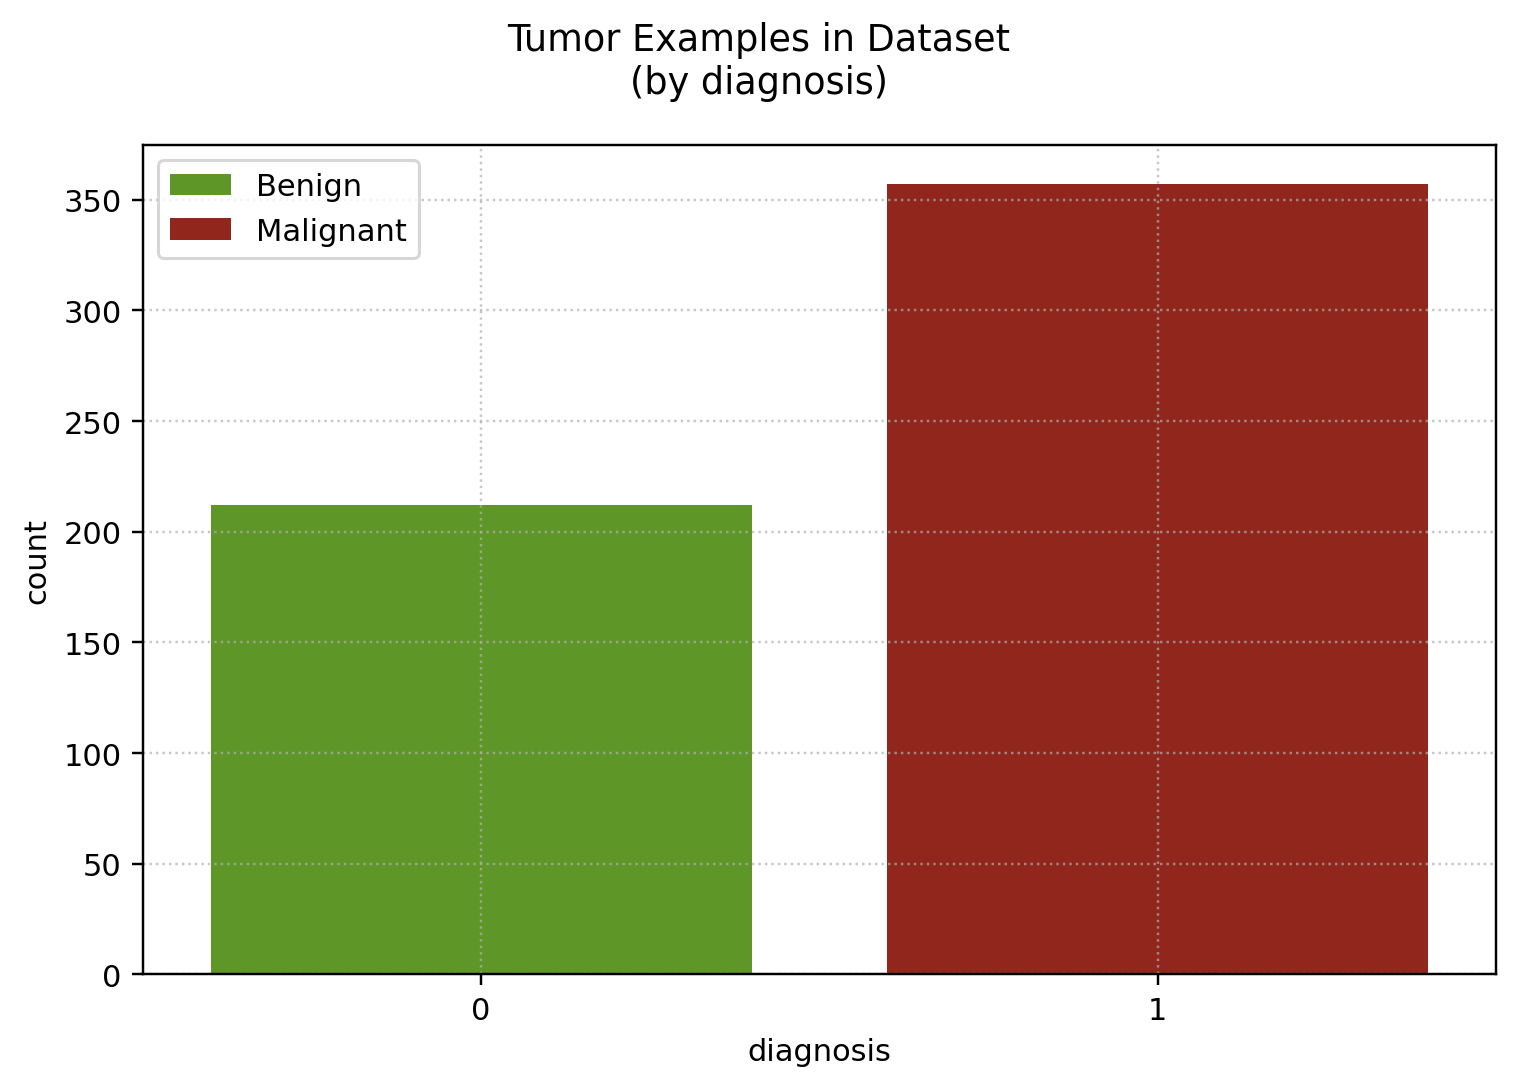

In [10]:
# countplot for target variable

fig, ax = plt.subplots(figsize=(7,5), dpi=220)

sns.countplot(x="diagnosis", data=df, ax=ax,
             palette={0:"#5EA916", 1:"#A31609"},
              label={0:"Benign", 1:"Malignant"},
             hue_order=[0, 1])

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.legend(labels=["Benign", "Malignant"])

fig.suptitle("Tumor Examples in Dataset\n(by diagnosis)")
fig.tight_layout();

In [11]:
# for plotting pie chart
diagnosis = np.array(df["diagnosis"].value_counts(normalize=True))*100
diagnosis = np.round(diagnosis, decimals=2)

In [12]:
diagnosis

array([62.74, 37.26])

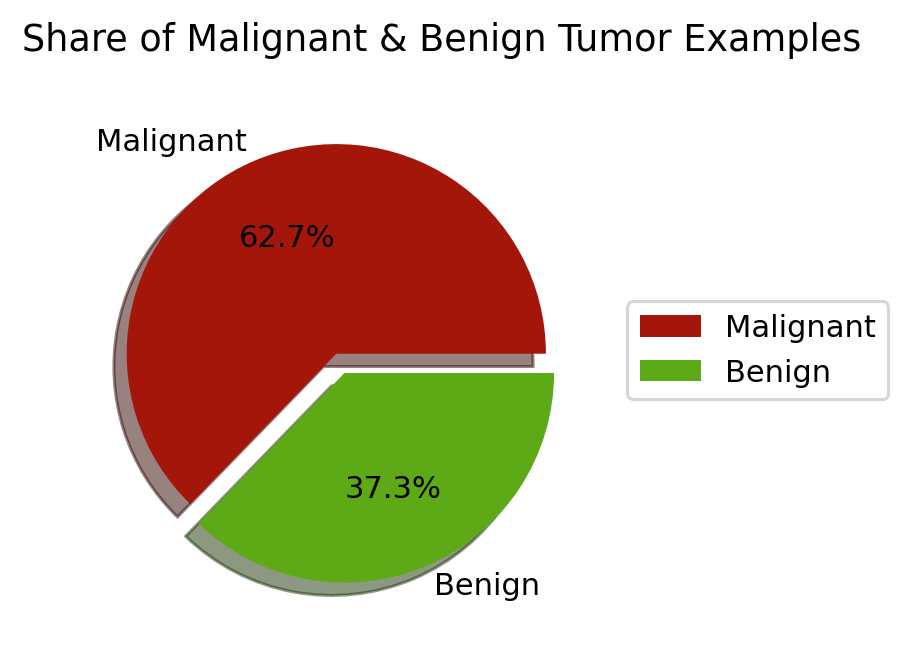

In [13]:
fig, ax = plt.subplots(figsize=(4,3), dpi=220)

colors = ["#A31609", "#5EA916"]
labels = ["Malignant", "Benign"]

ax.pie(x=diagnosis, colors=colors, labels=labels,
      autopct="%1.1f%%", explode=[0.1, 0], shadow=True)

ax.legend(loc=(1.04, 0.45))

fig.suptitle("Share of Malignant & Benign Tumor Examples")
fig.tight_layout();

>_Dataset is **relatively well-balanced** though there are **$\approx63\%$ examples of malignant tumors** and **$\approx37\%$ benign examples**._

## How correlated are the features among themselves?

In [14]:
# correlation datafram
correlation = df.corr()

# correlation of all features with target variable
corr_target = correlation["diagnosis"].sort_values(ascending=False)
# remove target variable
corr_target_2 = corr_target.drop(labels="diagnosis")

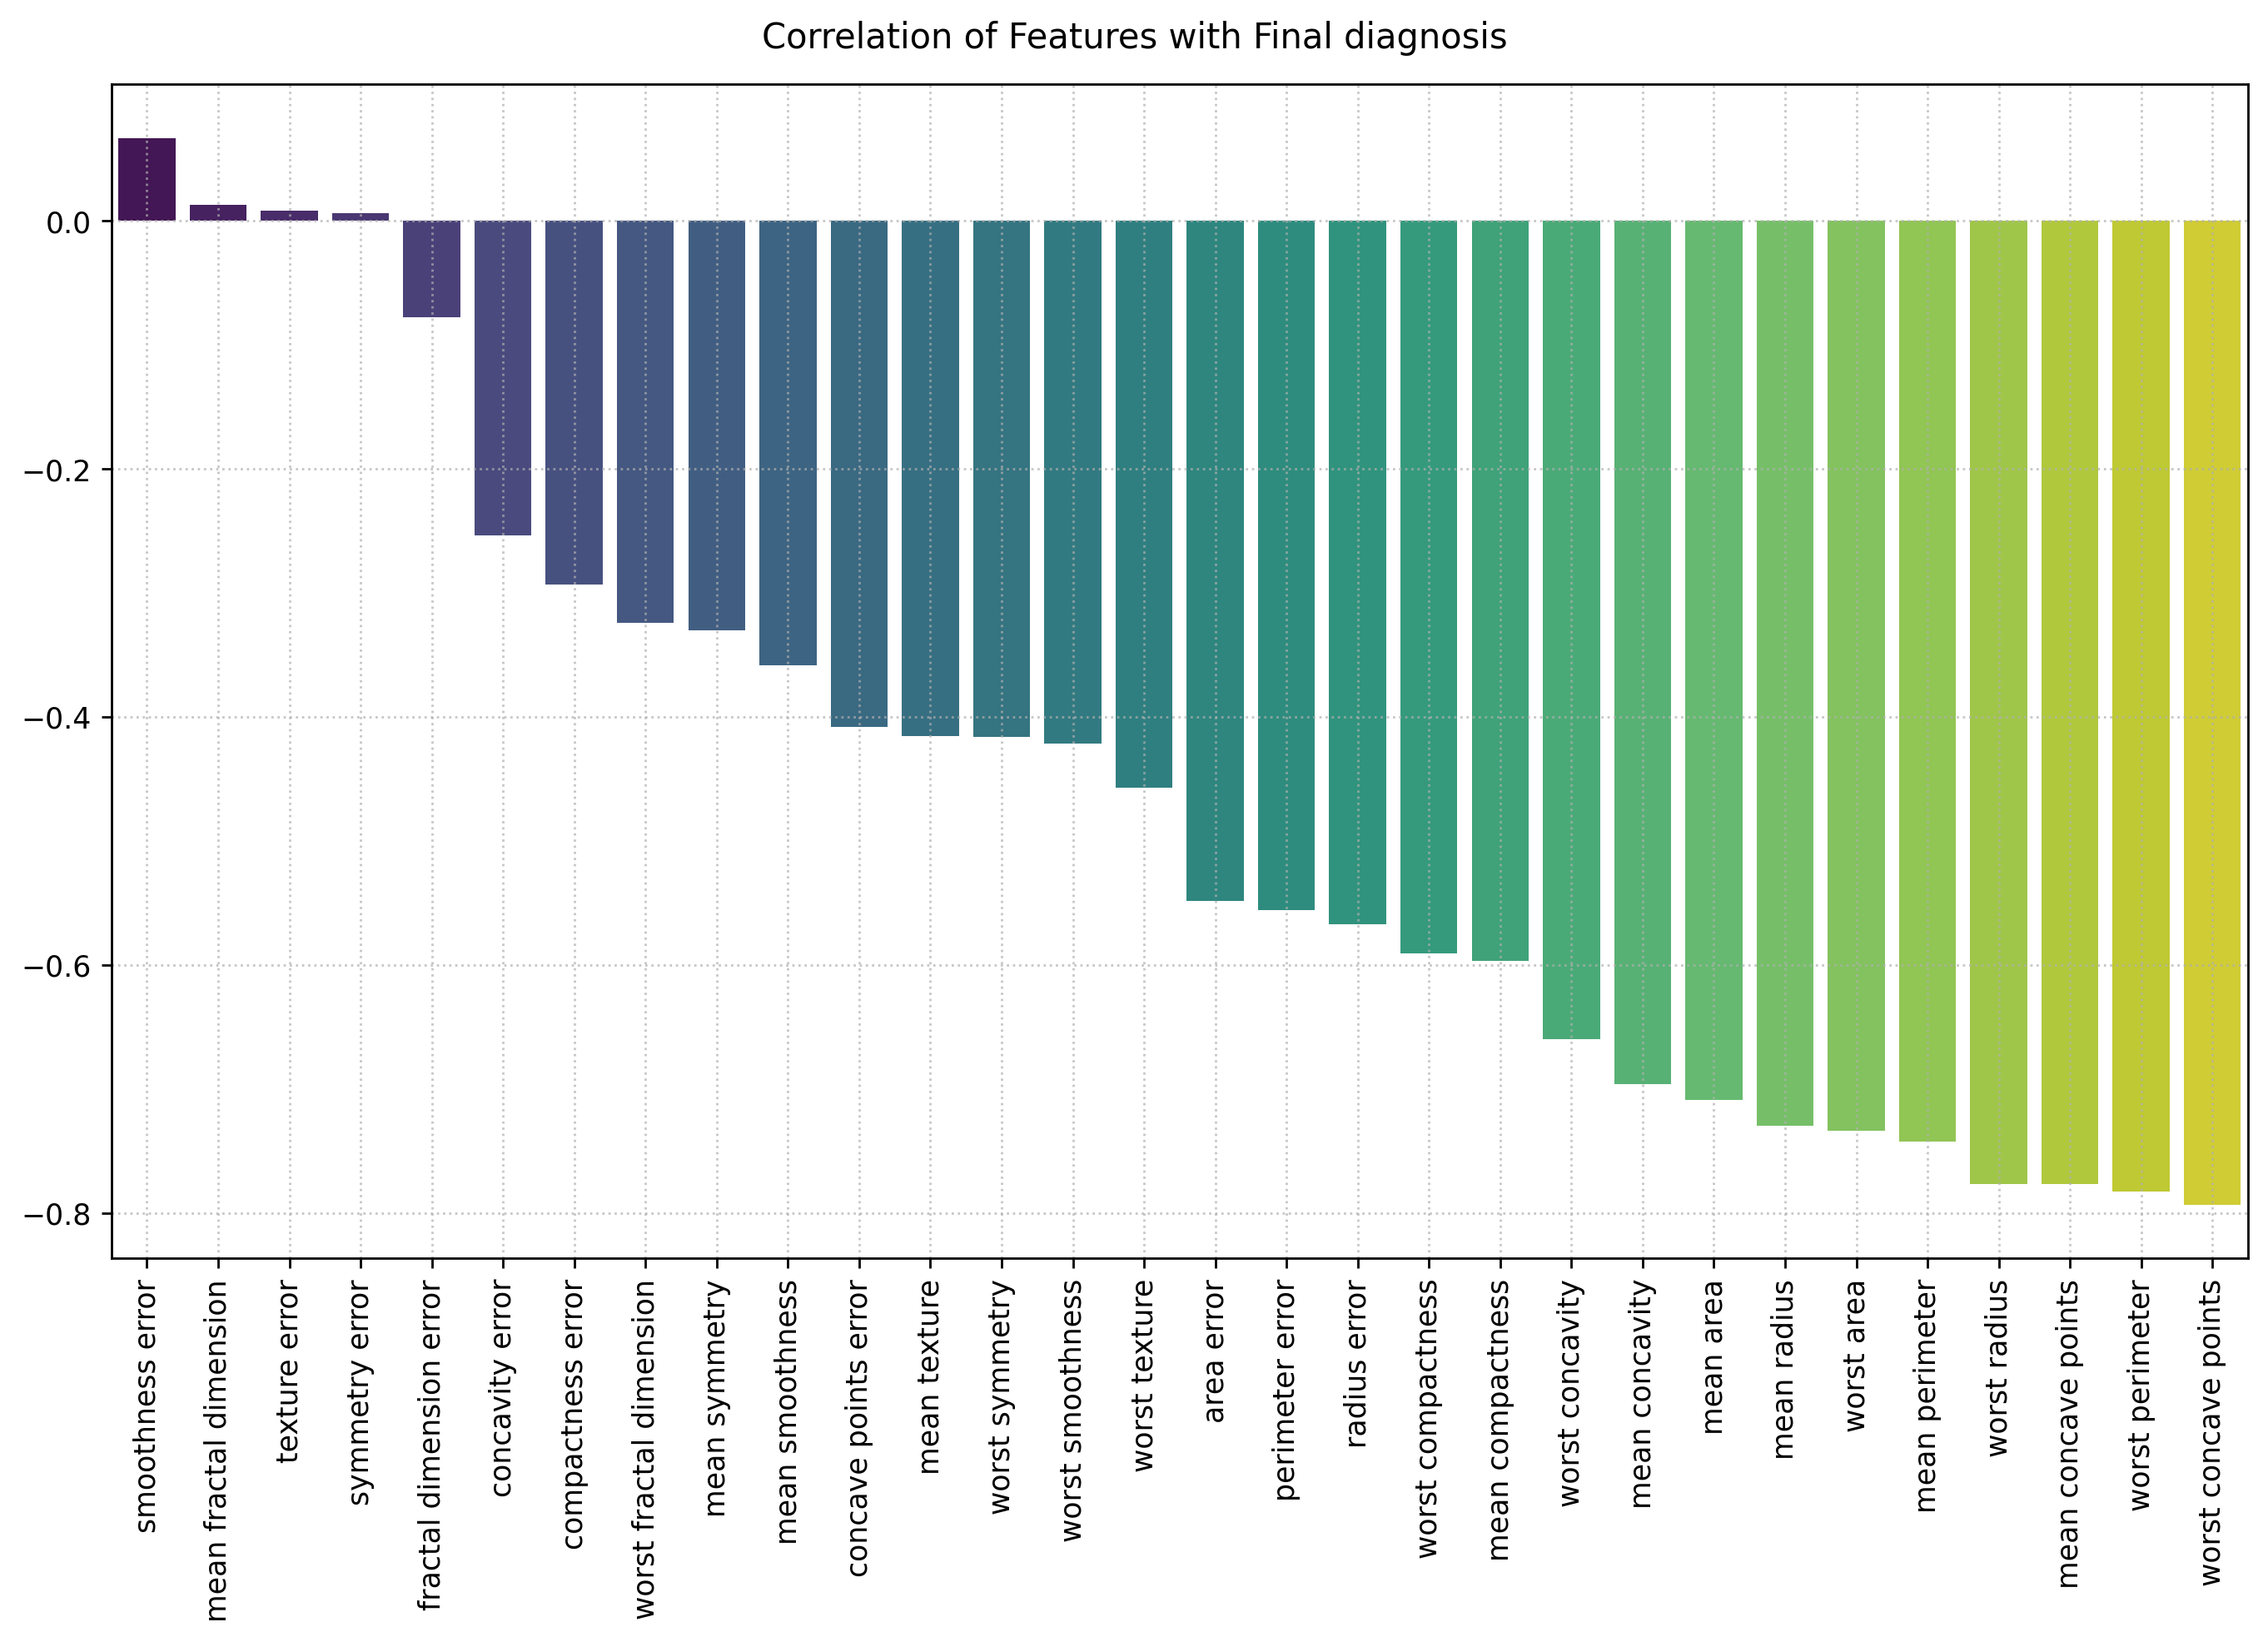

In [15]:
# plot correlation matrix

fig, ax = plt.subplots(figsize=(11,8), dpi=250)

sns.barplot(x=corr_target_2.index, y=corr_target_2.values,
            palette="viridis", ax=ax)

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


fig.suptitle("Correlation of Features with Final diagnosis")
fig.tight_layout();

>_A quick glance at above barplot reveals some **strong negative** correlations among various features and the target variable._
>>_Classification model should perform well on such a dataset._

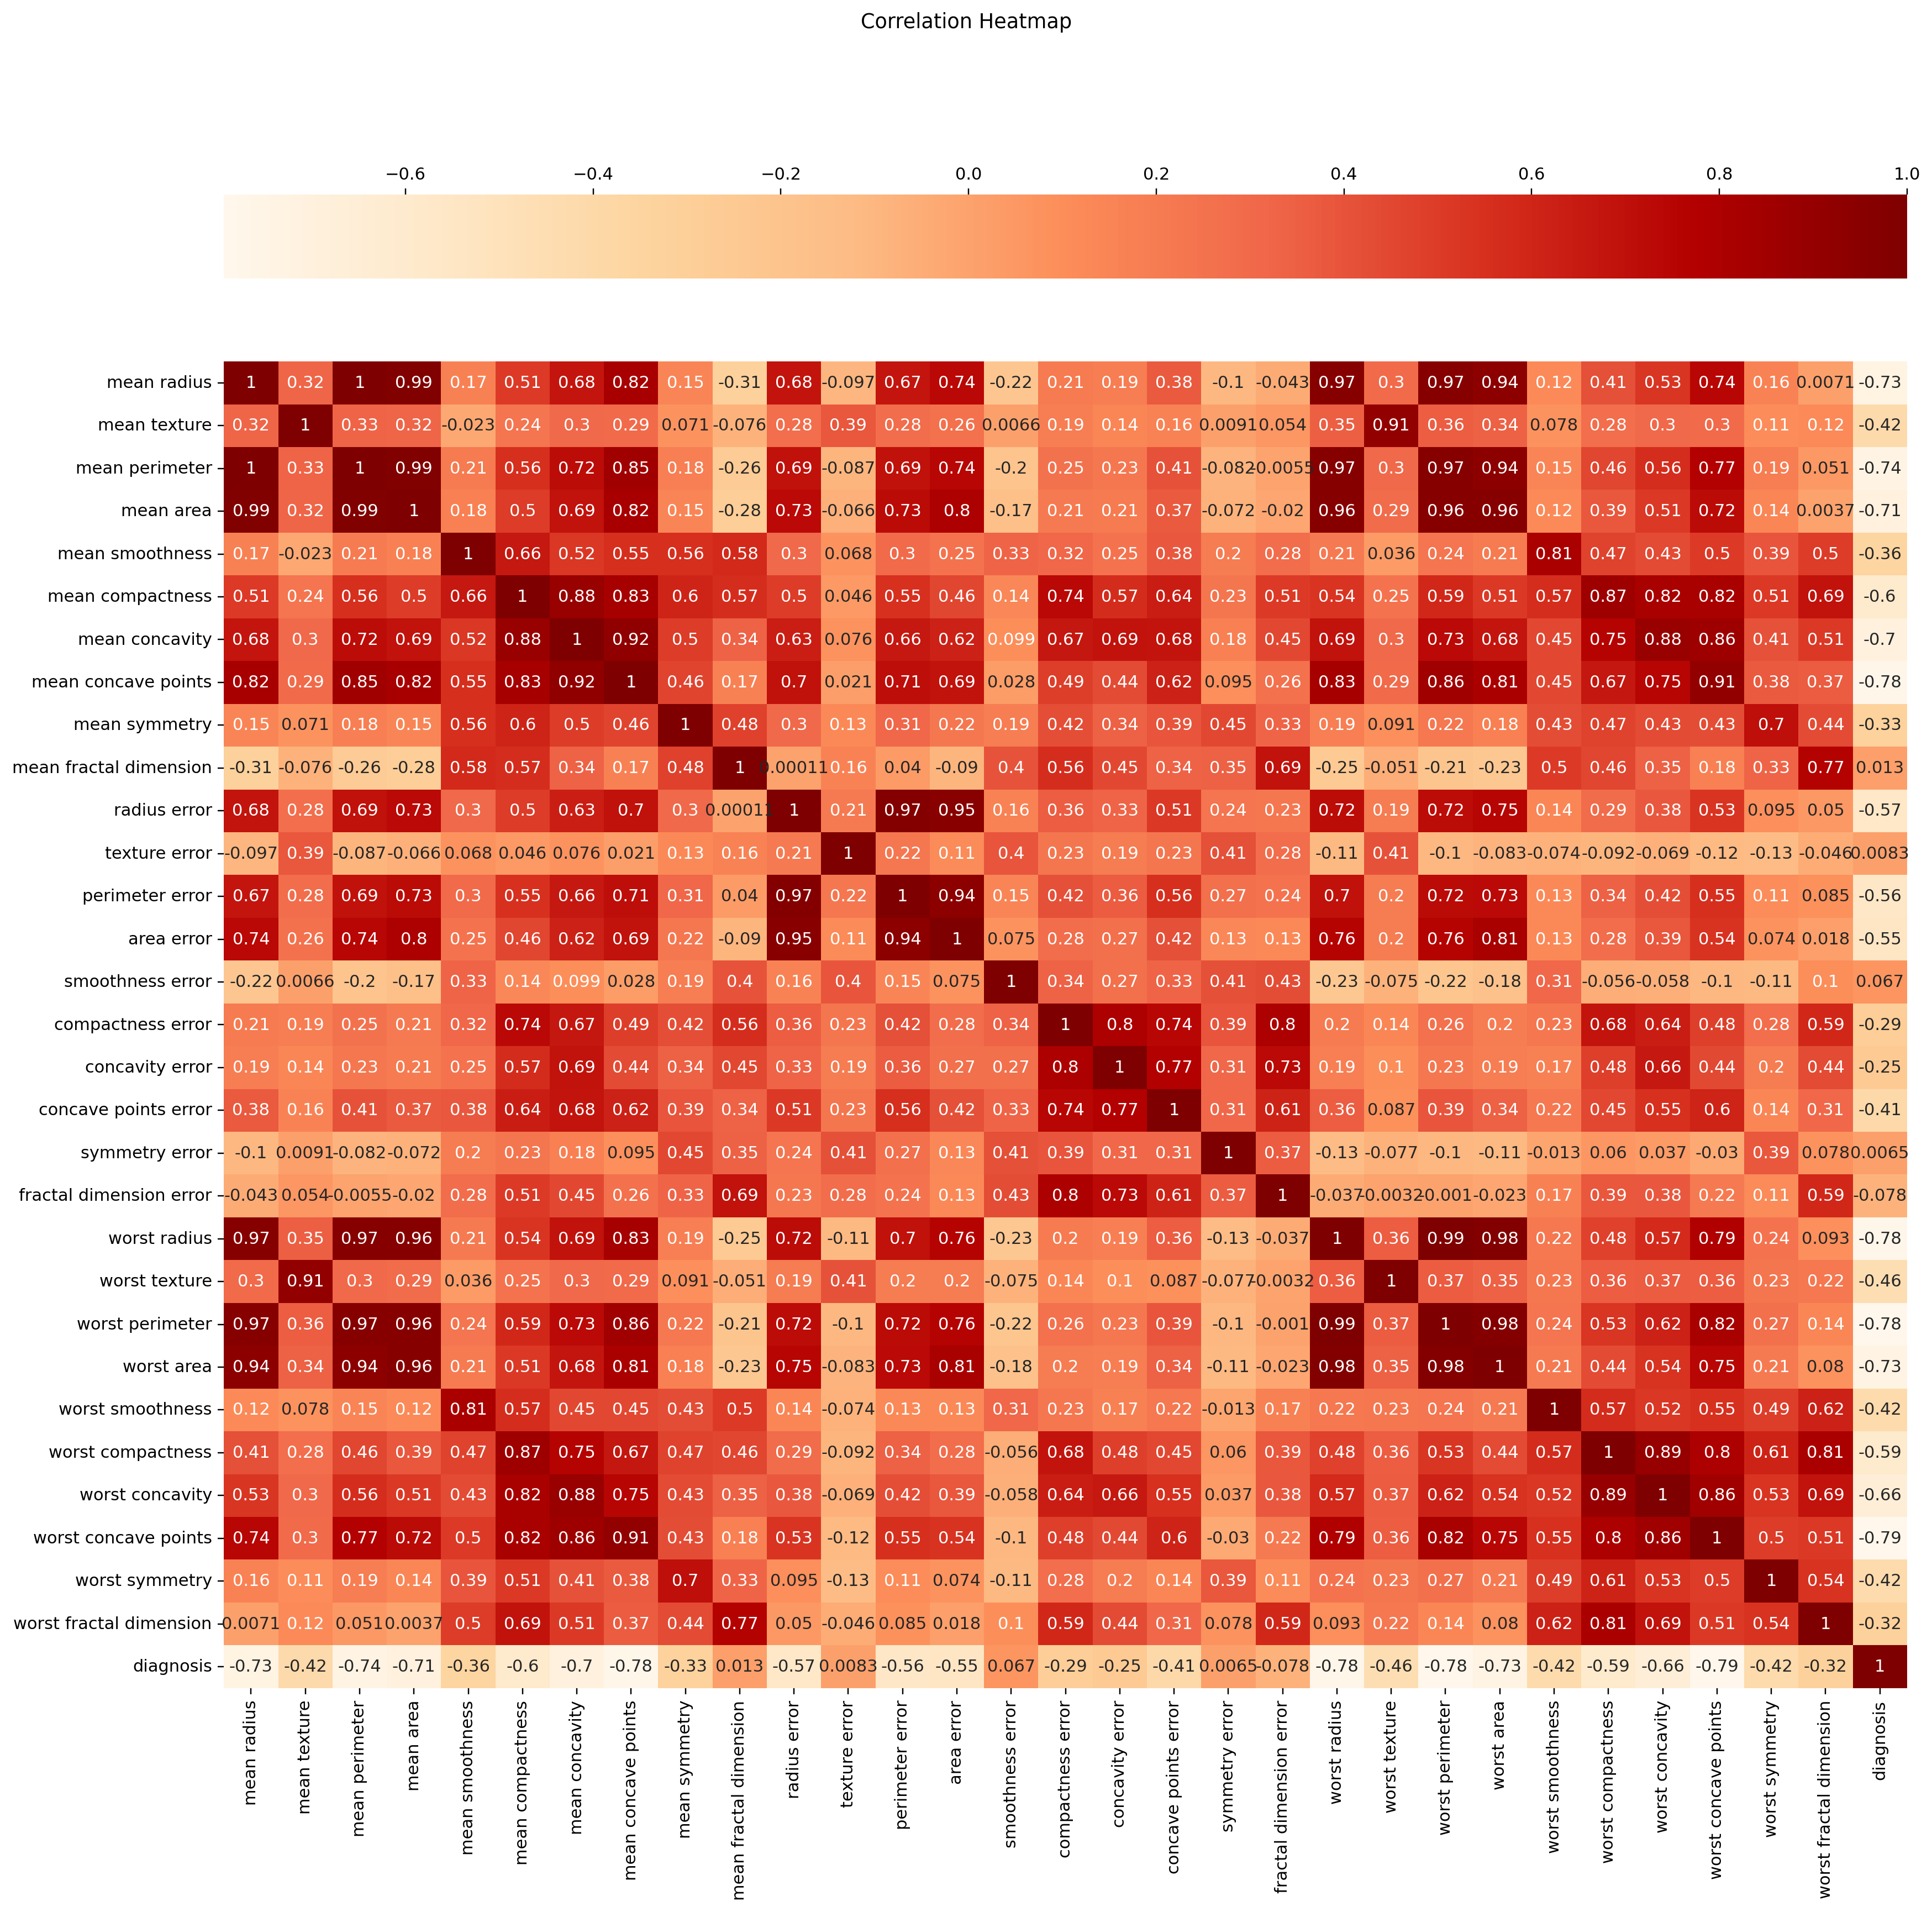

In [16]:
# further visualization of correlations

# plot correlation matrix

fig, ax = plt.subplots(figsize=(16,16), dpi=220)

sns.heatmap(data=correlation, cmap="OrRd",
           cbar_kws={"location":"top"}, cbar=True, ax=ax,
           square=False, annot=True)

fig.suptitle("Correlation Heatmap")
fig.tight_layout();

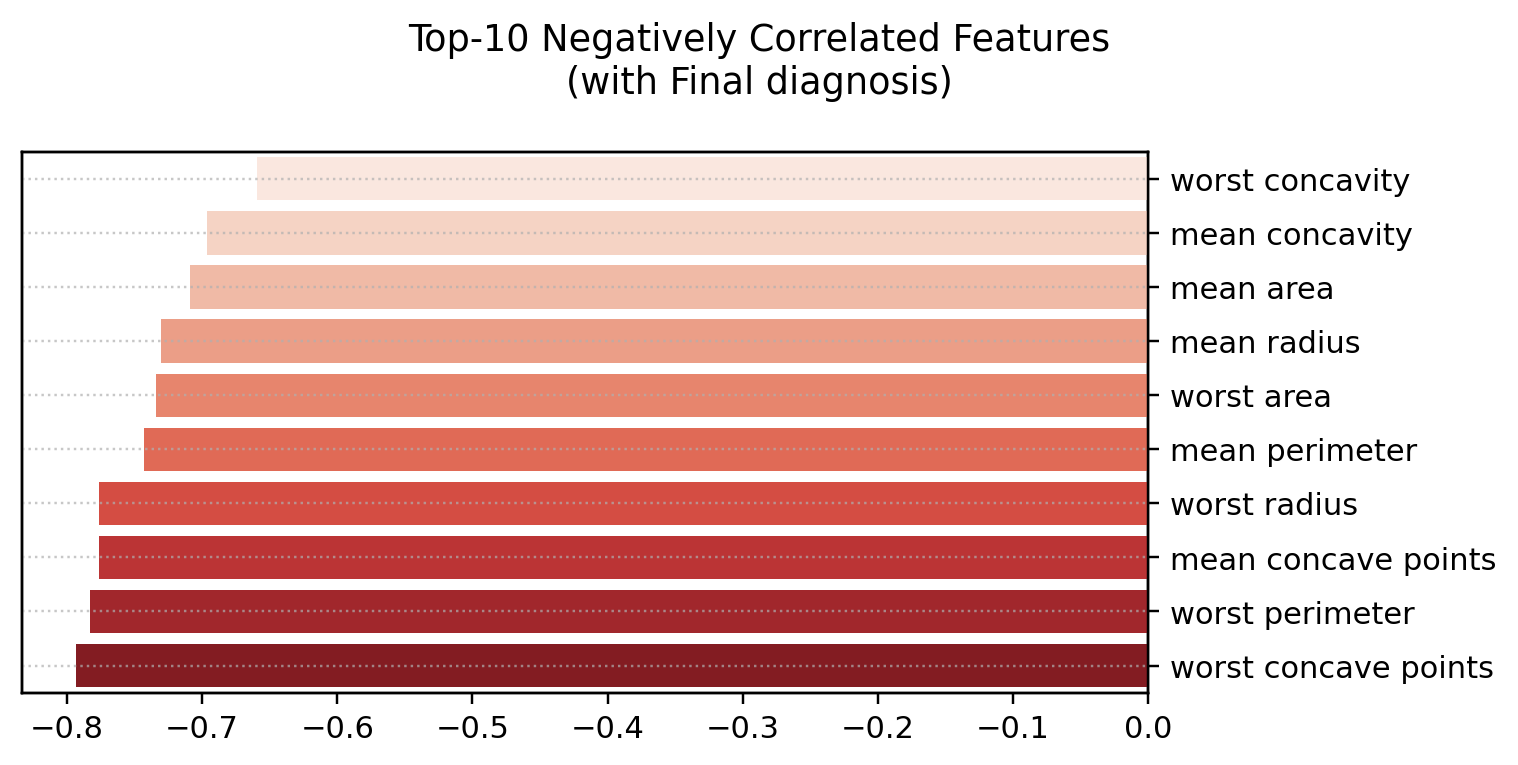

In [17]:
fig, ax = plt.subplots(figsize=(7,3.5), dpi=220)

ax2 = ax.twinx()
sns.barplot(y=corr_target_2.iloc[-10:].index, x=corr_target_2.iloc[-10:].values,
            palette="Reds", ax=ax2)

ax2.grid(linestyle=":", linewidth=0.8, alpha=0.7)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks([]) # hide y-axis of ax axes by setting it to empty list

fig.suptitle("Top-10 Negatively Correlated Features\n(with Final diagnosis)")
fig.tight_layout();

>_Top-10 negatively correlated features shown above are likely to become very important features when Neural Network has to learn how to distinguish between malignant & benign tumors._

## Visualizing Clusters formed by Top-10 Negatively Correlated Features

In [18]:
# dataset to plot
cols_plot = [x for x in corr_target_2.iloc[-10:].index]
cols_plot.append("diagnosis")

<Figure size 2500x1750 with 0 Axes>

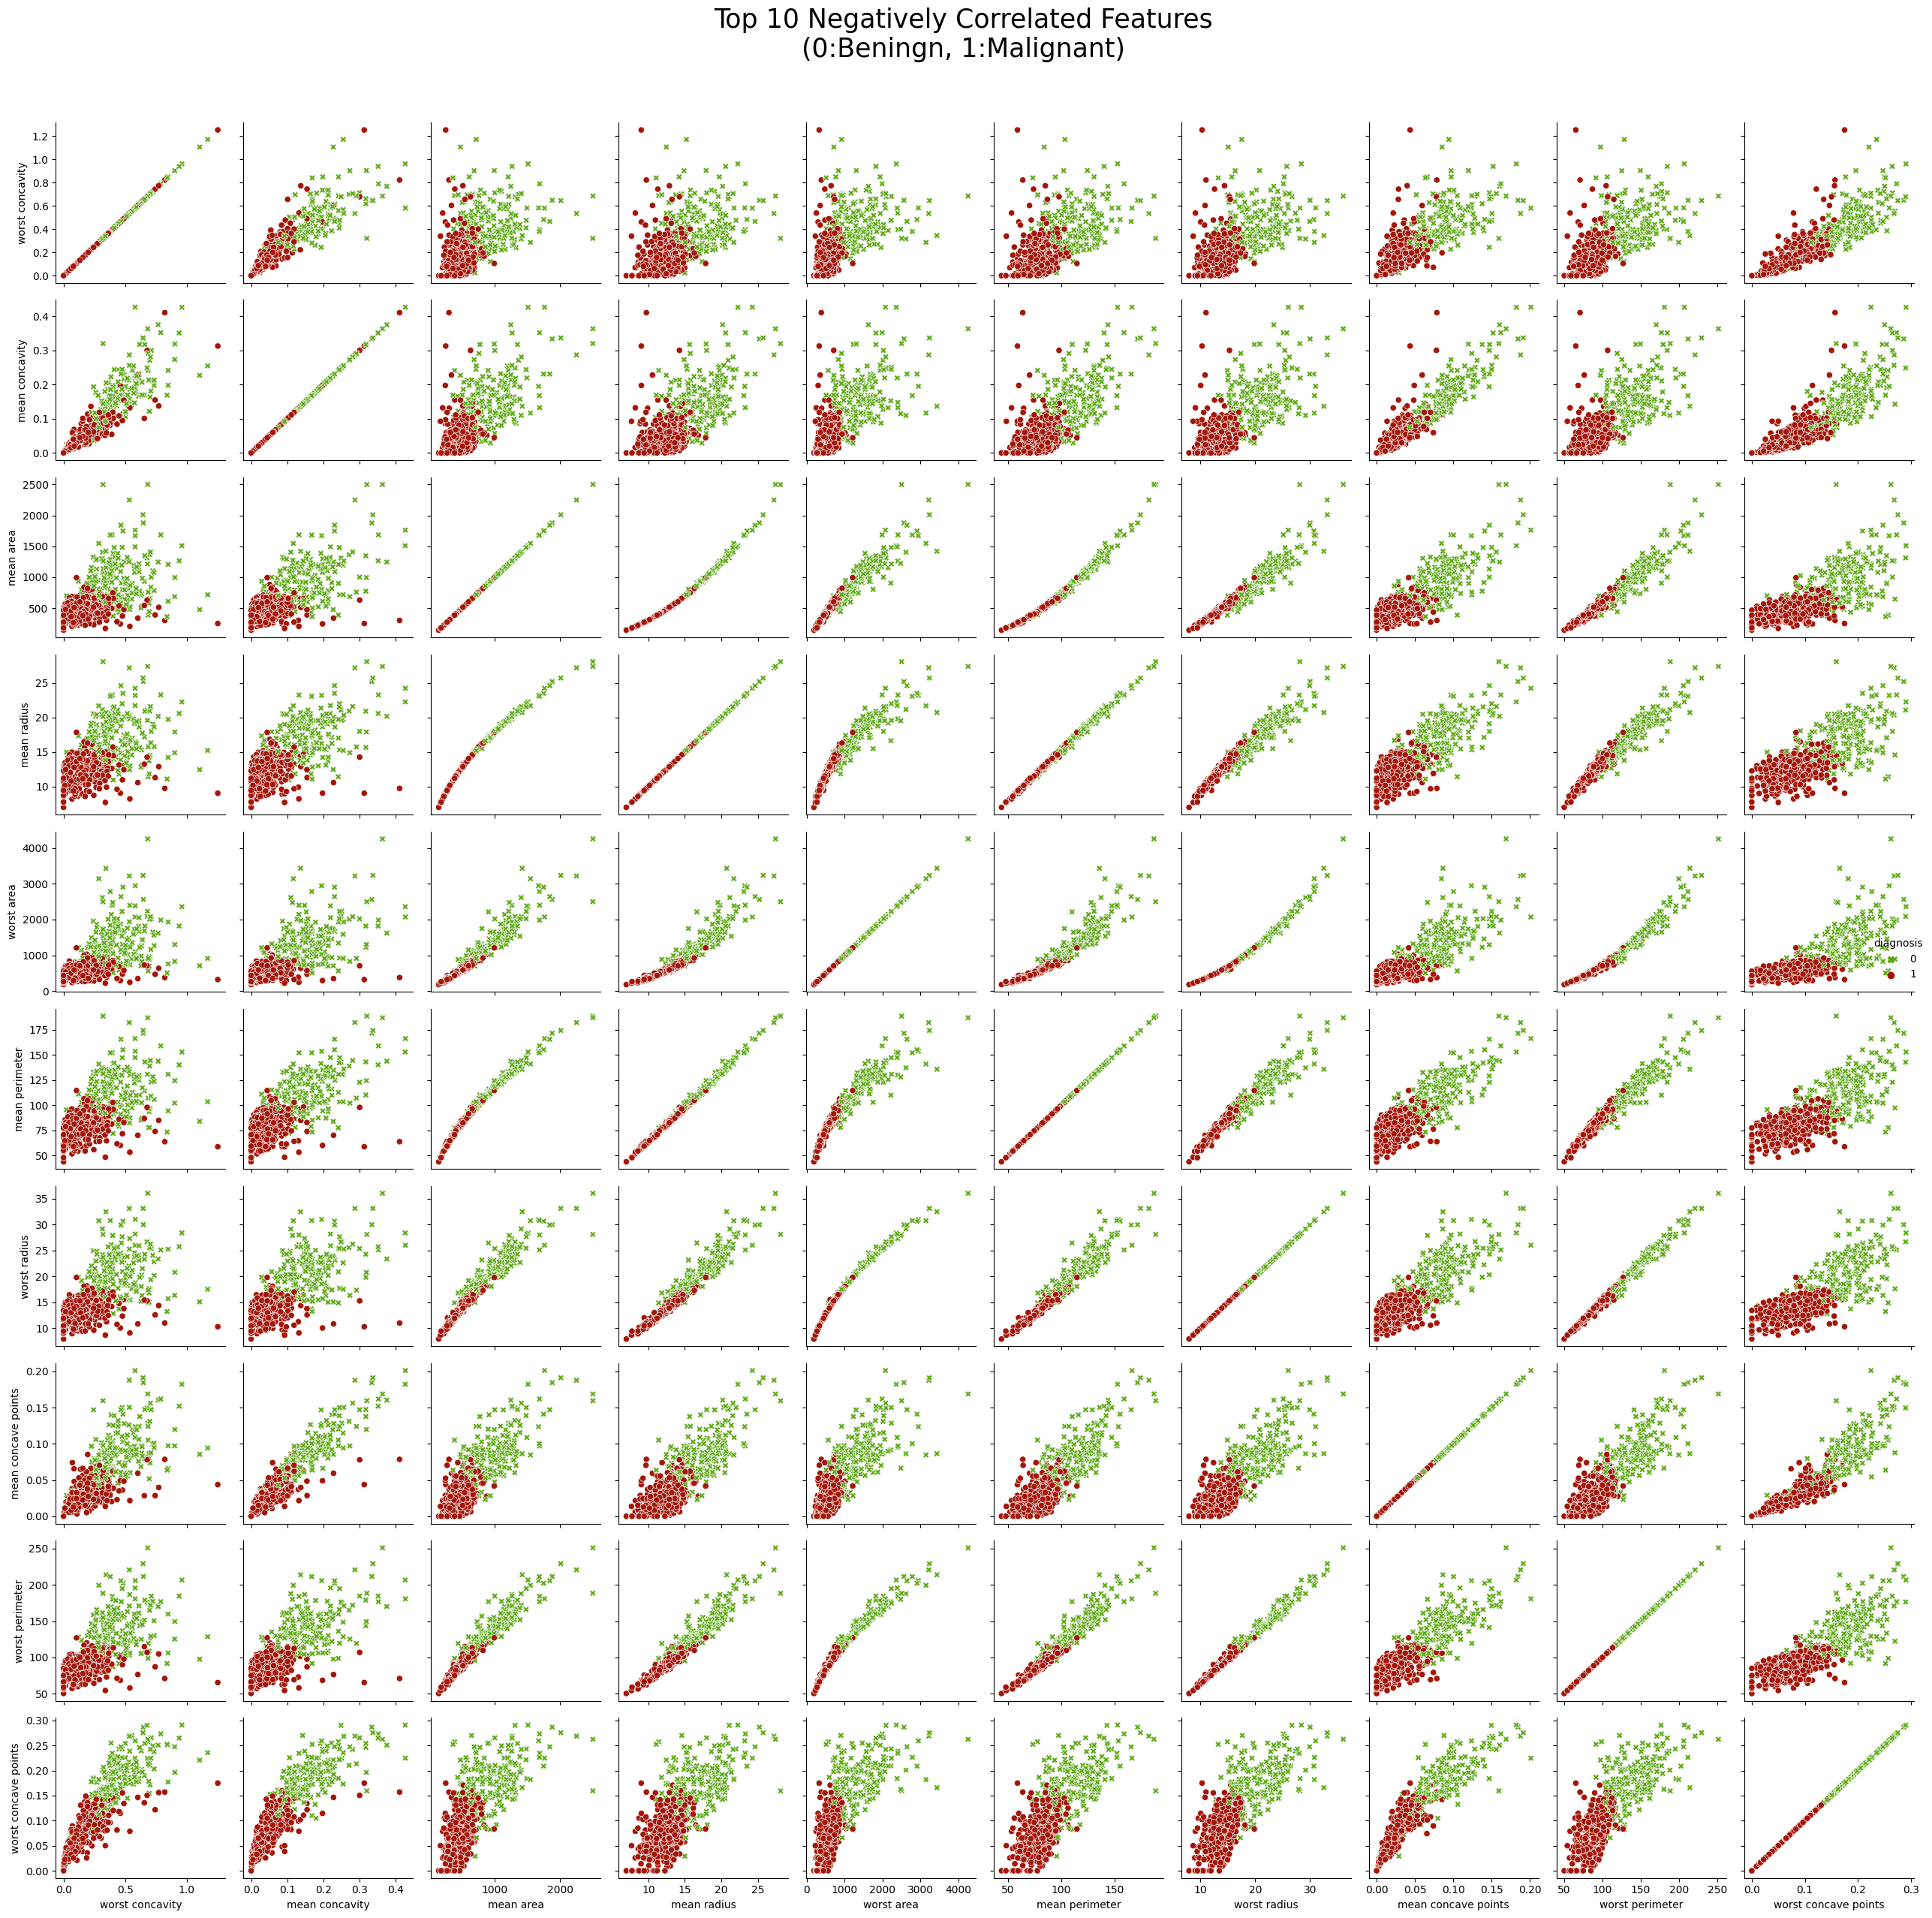

In [19]:
plt.figure(figsize=(10,7), dpi=250)

sns.pairplot(data=df[cols_plot], hue="diagnosis", palette={0:"#5EA916", 1:"#A31609"},
            markers=["X", "o"], diag_kind=None)

plt.suptitle("Top 10 Negatively Correlated Features\n(0:Beningn, 1:Malignant)",
            fontsize=25, y=1.02)
plt.tight_layout();

>_The above plots reveal that the top-10 negatively correlated features shows that they form **distinct clusters** when it comes to differentiating between malignant & benign tumors._
>>_Classification algorithm can be run on such a dataset._

In [20]:
# # check clusters

# fig, ax = plt.subplots(figsize=(4,4), dpi=220)

# sns.scatterplot(x="mean radius", y="mean texture", data=df,
#                ax=ax, hue="diagnosis")

# ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

# fig.suptitle("Diagnosis of Tumor\nv/s\nWorst Concave Points")
# fig.tight_layout();

# Preparing the Data for Training & Testing

## Separating Features & Target variable

In [21]:
# features
X = df.drop(columns="diagnosis")
X = np.array(X).reshape(-1, X.shape[1]) # convert into 2D Numpy array for feeding Neural Network

In [22]:
# target variable
y = df["diagnosis"]
y = np.array(y)

In [23]:
print(f"Dataset has {X.shape[0]} examples and {X.shape[1]} Input features.")
print(f"Target variable has 2 possible values -> {np.unique(y)[0]} & {np.unique(y)[1]}")

Dataset has 569 examples and 30 Input features.
Target variable has 2 possible values -> 0 & 1


## Creating a Training Set & Test Set
>_Dataset is **not too large**. Hence $25\%$ data will be kept for **Testing** and remaining $75\%$ used for **Training** the Neural Network._

In [24]:
# for splitting the data

from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)

## Scaling the Data
>_To make range of values for each feature comparable._
>_Will be using **Min-Max** scaling method which makes each feature range between values $0-1$_

**Min-Max Scaling** method $\rightarrow$
$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

$$X_{min} = Minimum\;value\;of\;that\;feature$$
$$X_{max} = Maximum\;value\;of\;that\;feature$$

In [26]:
# for scaling

from sklearn.preprocessing import MinMaxScaler

In [27]:
# scaler instance
scaler = MinMaxScaler()

In [28]:
# scaling the data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---

# Building the Neural Network Classifier Model

In [29]:
# for creating a dense sequential neural network architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [30]:
# check no. of features to decide input shape while feeding the NN
input_shape = X_train_scaled.shape[1]
print(f"Input shape for the NN = {input_shape}")

# convert into a tuple for integrating with NN
input_shape = (input_shape,)

Input shape for the NN = 30


In [31]:
# base Sequential model
model = Sequential()

In [32]:
# building the NN architecture one layer at a time

# input layer
model.add(Dense(units=30, activation="relu",
                input_shape=input_shape, name="layer1"))

# hidden layers
model.add(Dense(units=15, activation="relu", name="layer2"))

# output layer (sigmoid activation for binary classification)
model.add(Dense(units=1, activation="sigmoid", name="layer3"))

C:\Users\rayjo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the NN Model
>_Will **configure** the NN model for training stage._
>_Following aspects will be configured $\rightarrow$_
>1. **Optimization process** to be used while training
>2. The **Loss function** which is to be minimized while training for a binary classifier model
---

In [33]:
# compiling the NN model
    
model.compile(loss="binary_crossentropy", optimizer="adam")

# Training the Neural Network Model
1. Will use **Test set** for **evaluating** model's performance after **each training epoch/iteration** and updation of weights of the model.
    - won't affect training process since Test set will not be used for training
    ---
2. Since dataset is not too large, will retain the default **batch size** of 32 examples
---
#### NOTE: Batches & Epochs
1. **Epoch**
    - Total iterations over **entire training set** _i.e. NN goes through entire training set once in a single epoch_
    ---
2. **Batch size**
    - No. of examples considered for each step of updating weights
        - Keras considers dataset in chunks/batches to make training faster & optimized
        - **One epoch has multiple steps of gradient/weight updates** since NN needs to go through entire training set

>_Example,\
**Training Dataset** has **1000 samples**\
**Batch size** = **50** samples\
**Epochs** = **100** \
Since batch size is 50 and there are 1000 samples,\
model will take **1000/50 steps** to go through **entire dataset once**.\
i.e. For **one epoch, weights are updated 20 times** by considering the\
dataset of 1000 examples in batches/chunks of 50 examples._

In [34]:
# fitting the training set

model.fit(x=X_train_scaled, y=y_train, epochs=250,
         validation_data=(X_test_scaled, y_test))

Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6987 - val_loss: 0.6745
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6679 - val_loss: 0.6488
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6389 - val_loss: 0.6227
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6217 - val_loss: 0.5895
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5821 - val_loss: 0.5499
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5384 - val_loss: 0.5062
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4950 - val_loss: 0.4586
Epoch 8/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4467 - val_loss: 0.4137
Epoch 9/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4105 - val_loss: 0.3706
Epoch 10/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3728 - val_loss: 0.3326
Epoch 11/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3401 - val_loss: 0.2988
Epoch 12/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0376 - val_loss: 0.1616
Epoch 138/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 - val_loss: 0.1600
Epoch 139/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - val_loss: 0.1638
Epoch 140/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 - val_loss: 0.1608
Epoch 141/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0539 - val_loss: 0.1630
Epoch 142/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0441 - val_loss: 0.1619
Epoch 143/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0358 - val_loss: 0.1665
Epoch 144/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388 - val_loss: 0.1638
Epoch 145/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0534 - val_loss: 0.1648
Epoch 146/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0488 - val_loss: 0.1658
Epoch 147/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0299 - val_loss: 0.1686
Epoch 148/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

# Evaluation of NN Model's Performance

## Comparing Training Loss & Validation Loss

In [35]:
# check history of losses while training

# since validation_test was performed after each training epoch,
# model.history.history has loss, val_loss in each row
# each row represents each epoch

# save as a dataframe
losses_history = pd.DataFrame(data=model.history.history)

In [36]:
# separate out for plotting
loss = losses_history["loss"]
val_loss = losses_history["val_loss"]

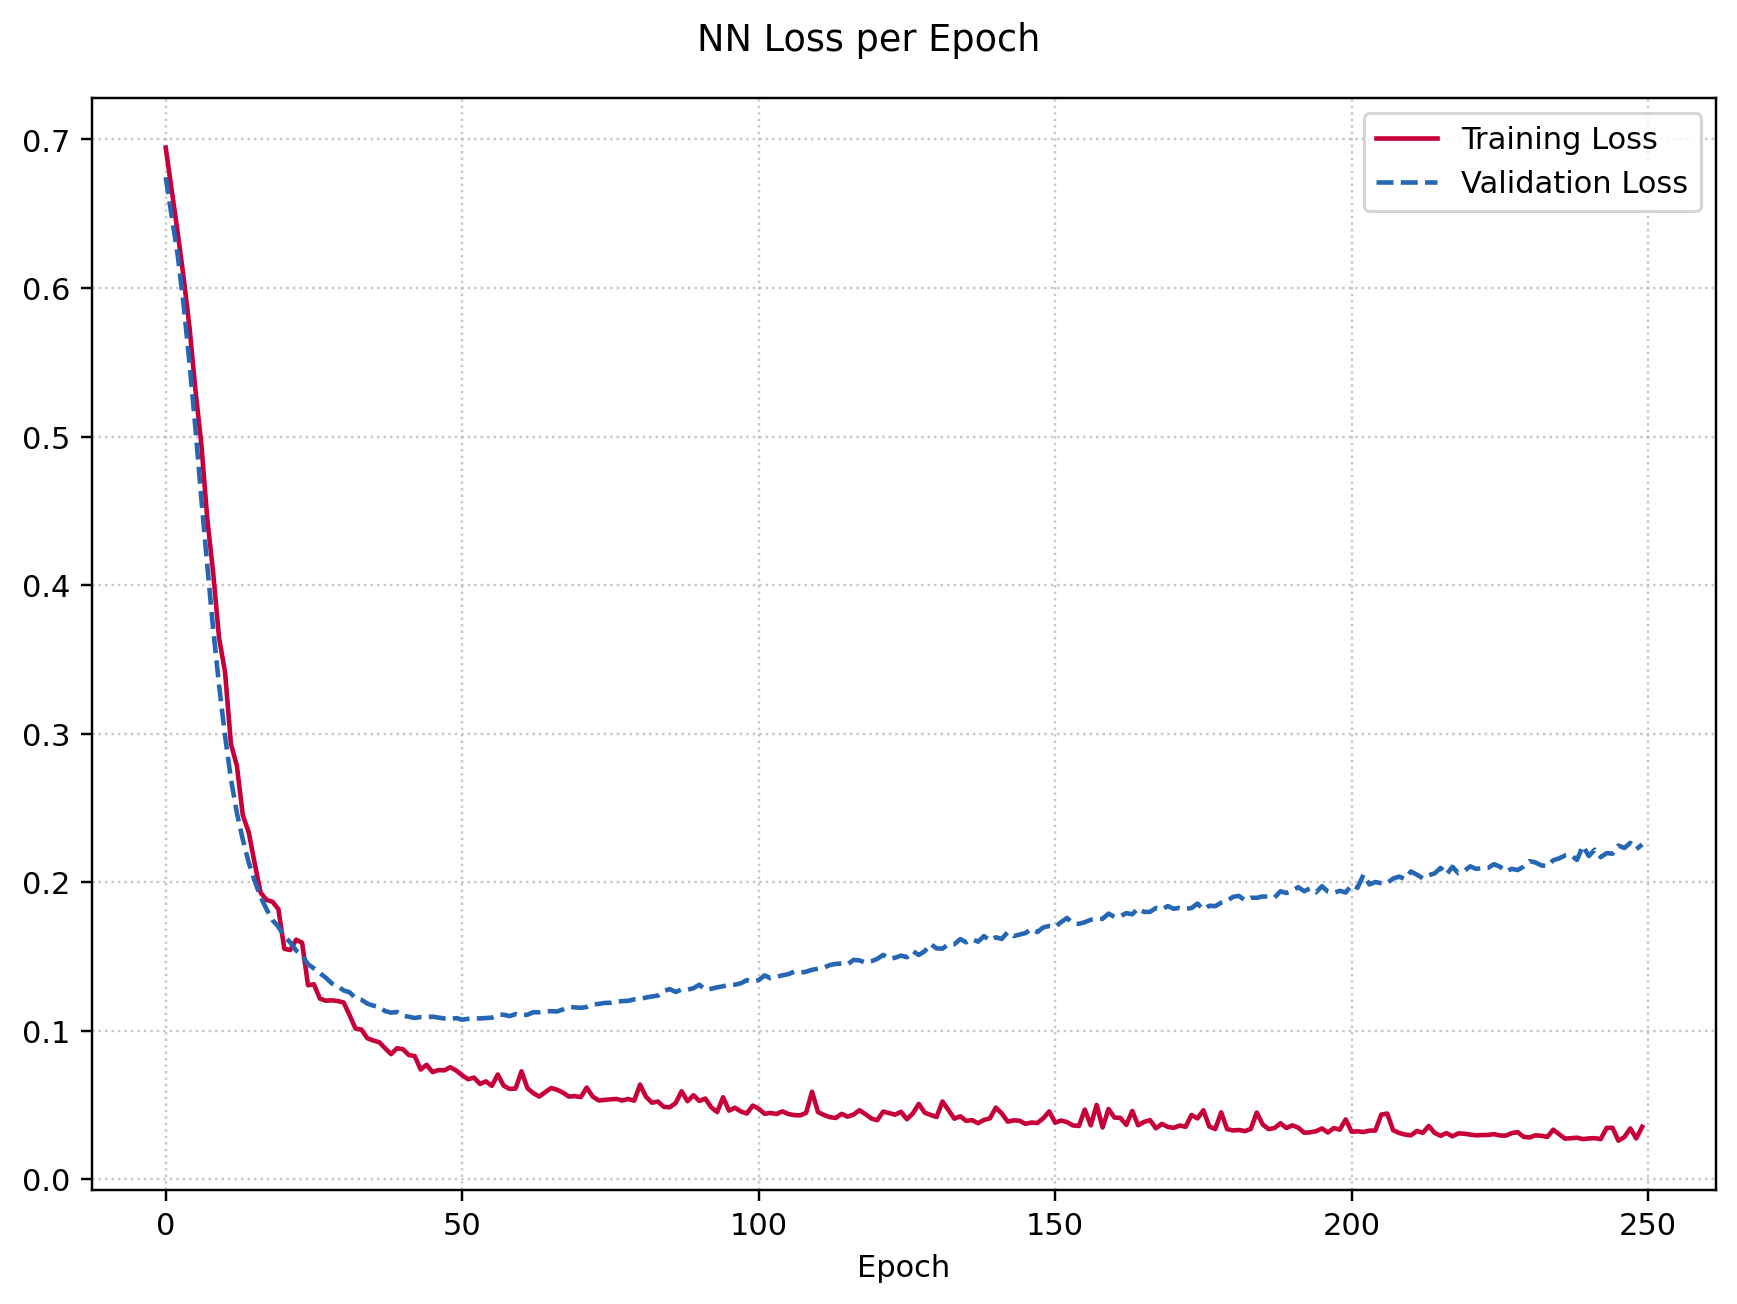

In [37]:
fig, ax = plt.subplots(figsize=(8,6), dpi=220)

xVals = model.history.epoch # array of all epochs

# loss
ax.plot(xVals, loss, color="#C70039", label="Training Loss")
# validation loss
ax.plot(xVals, val_loss, color="#2566B5",
        label="Validation Loss", linestyle="--")

ax.legend(loc="best")
ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

ax.ticklabel_format(axis="both", style="plain")
ax.set_xlabel("Epoch")
fig.suptitle("NN Loss per Epoch")
fig.tight_layout();

### Observation
1. **Training loss** keeps **decreasing continuously** whereas **Loss on Validation set**, after **decreasing initially** in sync with training loss, starts **increasing** after **$\approx20-25$ epochs**
    - suggests that NN model is **overfitting** and has **high variance**

>_Suggests that we may have been training for way **more epochs than needed** for this small-medium sized dataset._

# Re-training NN Classifier Model with Early Stopping as needed- Try 1

>_Will be invoking the **`EarlyStopping`** class from **`tensorflow.keras.callbacks`** module.\
This allows stopping training process early based on the various input  **stopping criterias** mentioned._

Following stopping criterias will be provided $\rightarrow$
1. `monitor`: Quantity to monitor for deciding when to stop training
    - default is "val_loss" i.e. Validation Loss computed after each epoch of training
2. `min_delta`: To consider it an improvement in NN performance, minimum how much change in the monitored quantity should be achieved?
3. `patience`: No. of epochs for which if the NN passes without any improvement in the metric being monitored then the training process will be stopped
4. `mode`: {"auto", "min", "max"}
    - `min` $\rightarrow$ Training stopped if monitored metric stops decreasing
        - _Ex. When metric is validation loss, we want to minimize it_
    - `max` $\rightarrow$ Training stopped if monitored metric stops increasing
        - _Ex. When metric is accuracy, we want to maximize it_
    - `auto` (default) $\rightarrow$ Automatically infers from the monitored metric the direction of movement in metric value to consider
5. `verbose`: 0 or 1
    - 1: Displays message when some early stopping decision is invoked
    - 0: Silent

In [38]:
# for early stopping

from tensorflow.keras.callbacks import EarlyStopping

In [39]:
# create the sequential NN model again

# base Sequential model
model = Sequential()

# building the NN architecture one layer at a time

# input layer
model.add(Dense(units=30, activation="relu",
                input_shape=input_shape, name="layer1"))

# hidden layers
model.add(Dense(units=15, activation="relu", name="layer2"))

# output layer (sigmoid activation for binary classification)
model.add(Dense(units=1, activation="sigmoid", name="layer3"))

In [40]:
# compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam")

In [41]:
# define early stopping

# will wait for 20 epochs and if validation loss is not decreasing over that period
# then training will be stopped early
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                          patience=20, verbose=1)

In [42]:
# start fitting the NN model to training set

# passing in the early stopping object inside a list
model.fit(x=X_train_scaled, y=y_train, epochs=250,
         validation_data=(X_test_scaled, y_test),
         callbacks=[early_stop])

Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6706 - val_loss: 0.6514
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6517 - val_loss: 0.6155
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6140 - val_loss: 0.5784
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5782 - val_loss: 0.5346
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5340 - val_loss: 0.4889
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4875 - val_loss: 0.4435
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4472 - val_loss: 0.4001
Epoch 8/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3874 - val_loss: 0.3600
Epoch 9/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3656 - val_loss: 0.3272
Epoch 10/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3257 - val_loss: 0.2970
Epoch 11/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3148 - val_loss: 0.2718
Epoch 12/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

### Observation
>_Training was **stopped early** after **epoch 61** though the total maximum epochs was 250._

## Evaluating Performance of Re-trained NN Binary Classifier

In [43]:
# dataframe of loss history
losses_history_early = pd.DataFrame(data=model.history.history)

In [44]:
# separate variables for plotting
loss_early = losses_history_early["loss"]
val_loss_early = losses_history_early["val_loss"]

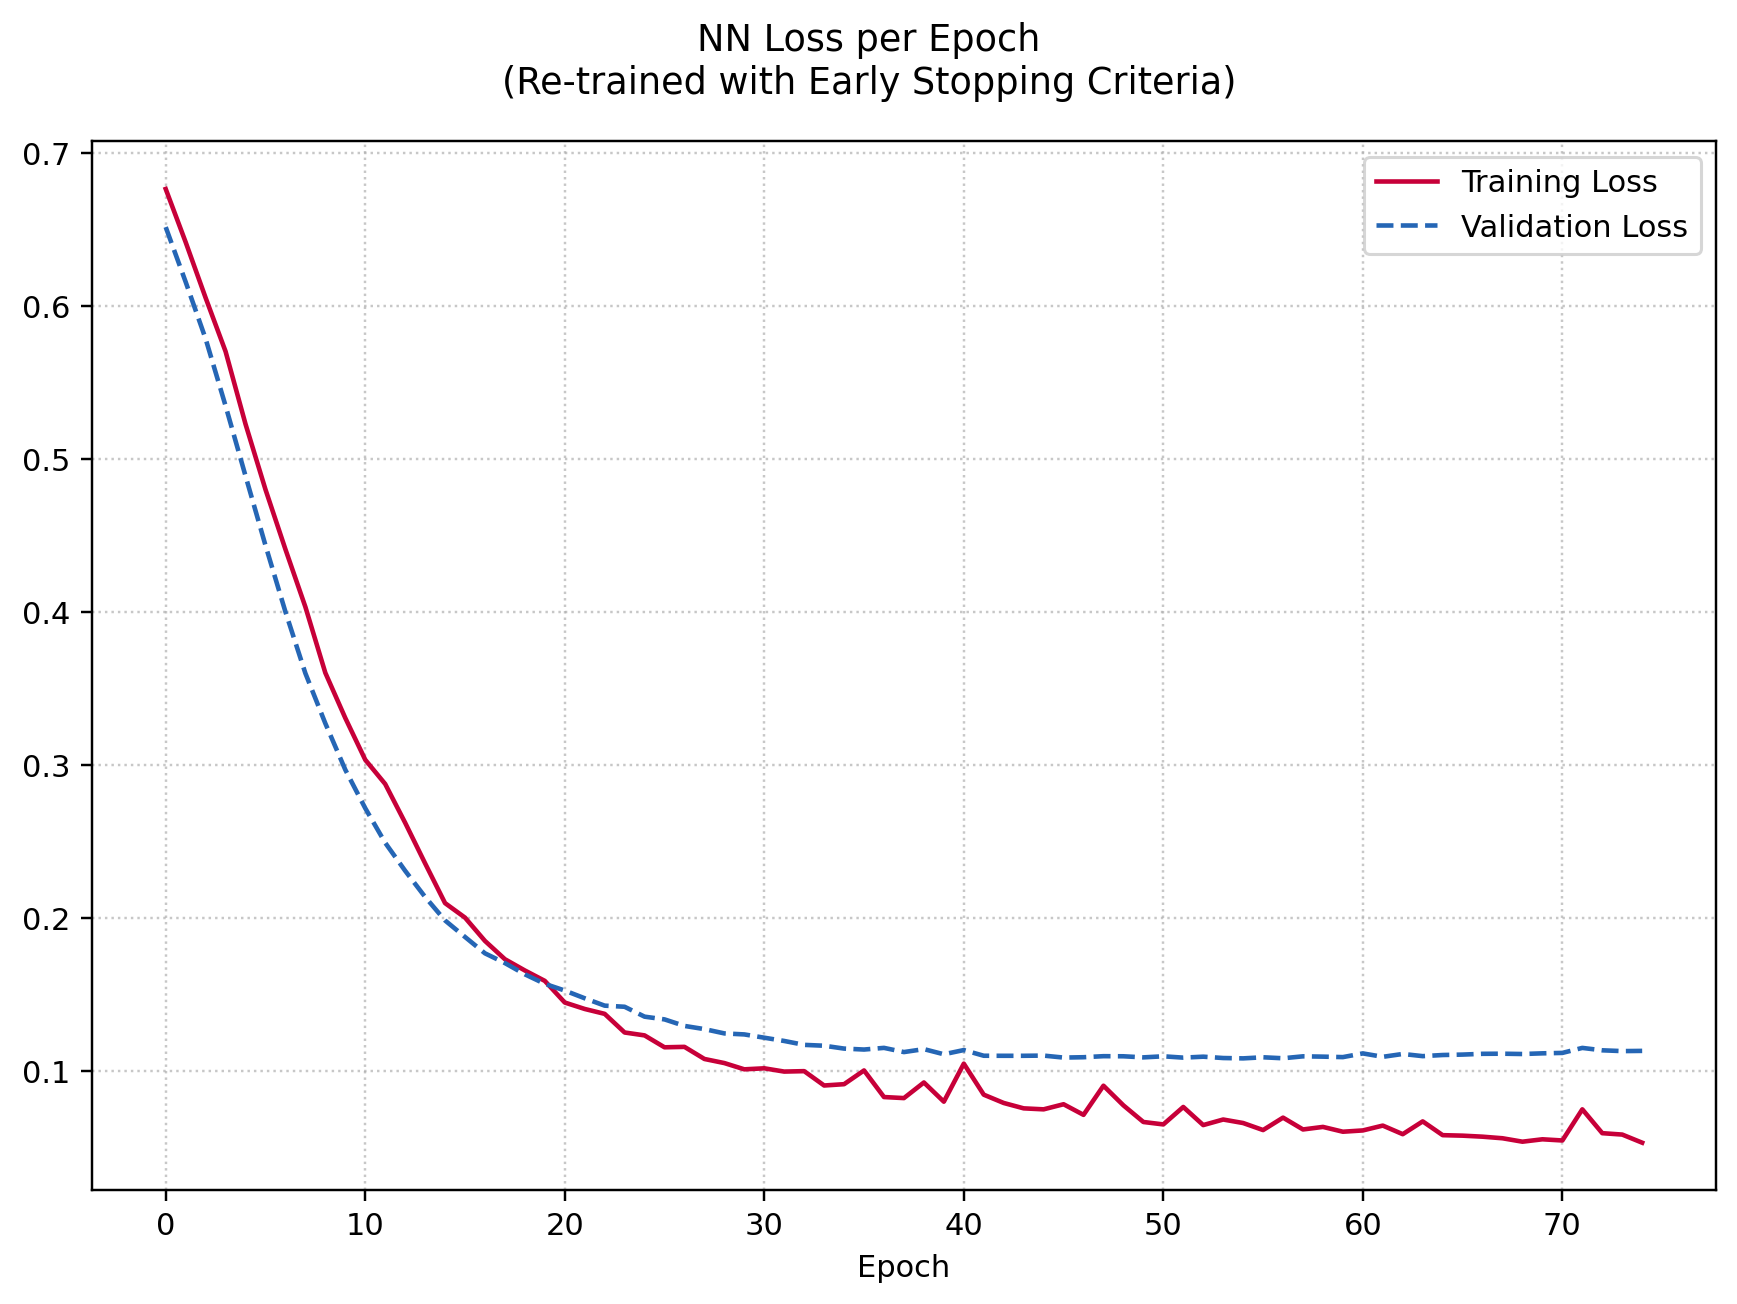

In [45]:
# plot loss history of re-trained model

fig, ax = plt.subplots(figsize=(8,6), dpi=220)

xVals = model.history.epoch # array of all epochs

# loss
ax.plot(xVals, loss_early, color="#C70039", label="Training Loss")
# validation loss
ax.plot(xVals, val_loss_early, color="#2566B5",
        label="Validation Loss", linestyle="--")

ax.legend(loc="best")
ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

ax.ticklabel_format(axis="both", style="plain")
ax.set_xlabel("Epoch")
fig.suptitle("NN Loss per Epoch\n(Re-trained with Early Stopping Criteria)")
fig.tight_layout();

### Observation
1. The plot reveals that we are **still prone to overfitting** as losses start **diverging after $\approx12-15$ epoch**
2. However, _unlike previous model_ validation loss **did not start increasing** and more or less **flattened out**

---
>_For improving performance further can try adding **Dropout layer**.\
This will **randomly turn-off a fraction of total neurons** in the NN model._

# Re-training NN Classifier Model with Drop Out layer- Try 1
>_Will be using **`Dropout`** class from **`tensorflow.keras.layers`** module and add this layer while defining NN architecture.\
Randomly turns off some neurons to prevent overfitting the NN model at **each update of weights**._
>>_Example, if `rate=0.5`\
during each update of weights (= **one pass through a single batch of an epoch**) 50% neurons will be randomly selected and turned off. Then the training for that batch will be done._

Following parameters can be adjusted $\rightarrow$
1. `rate`: Fraction of neurons to turn-off
    - float between $0-1$
    
>_Dropout encourages the network to **learn more generalized and less training set reliant features**, leading to improved performance on previously unseen data, i.e. ensure NN model generalizes well._

In [46]:
# re-create model for training again

# create the sequential NN model again

# base Sequential model
model = Sequential()

# building the NN architecture one layer at a time

# input layer
model.add(Dense(units=30, activation="relu",
                input_shape=input_shape, name="layer1"))
# add dropout layer for input layer ("layer1")
# turn-off 50% of the neurons during each batch of training (in each epoch)
model.add(Dropout(rate=0.5)) 

# hidden layers
model.add(Dense(units=15, activation="relu", name="layer2"))
# add dropout layer for hidden layer ("layer2")
# turn-off 50% of the neurons during each batch of training (in each epoch)
model.add(Dropout(rate=0.5)) 

# output layer (sigmoid activation for binary classification)
model.add(Dense(units=1, activation="sigmoid", name="layer3"))

In [47]:
# compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam")

In [48]:
# define early stopping criterias

early_stop_drop = EarlyStopping(monitor="val_loss", mode="min",
                          patience=20, verbose=1)

In [49]:
# fit model

# passing in the early stopping object inside a list
model.fit(x=X_train_scaled, y=y_train, epochs=250,
         validation_data=(X_test_scaled, y_test),
         callbacks=[early_stop_drop])

Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7168 - val_loss: 0.7078
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7042 - val_loss: 0.6948
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6983 - val_loss: 0.6790
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6688 - val_loss: 0.6623
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6643 - val_loss: 0.6494
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6439 - val_loss: 0.6321
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6424 - val_loss: 0.6139
Epoch 8/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6276 - val_loss: 0.5950
Epoch 9/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6089 - val_loss: 0.5730
Epoch 10/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6003 - val_loss: 0.5486
Epoch 11/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5768 - val_loss: 0.5230
Epoch 12/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

## Evaluation after re-training with both Dropout layers and Early stopping

In [50]:
losses_history_early_drop = pd.DataFrame(model.history.history)

In [51]:
loss_early_drop = losses_history_early_drop["loss"]
val_loss_early_drop = losses_history_early_drop["val_loss"]

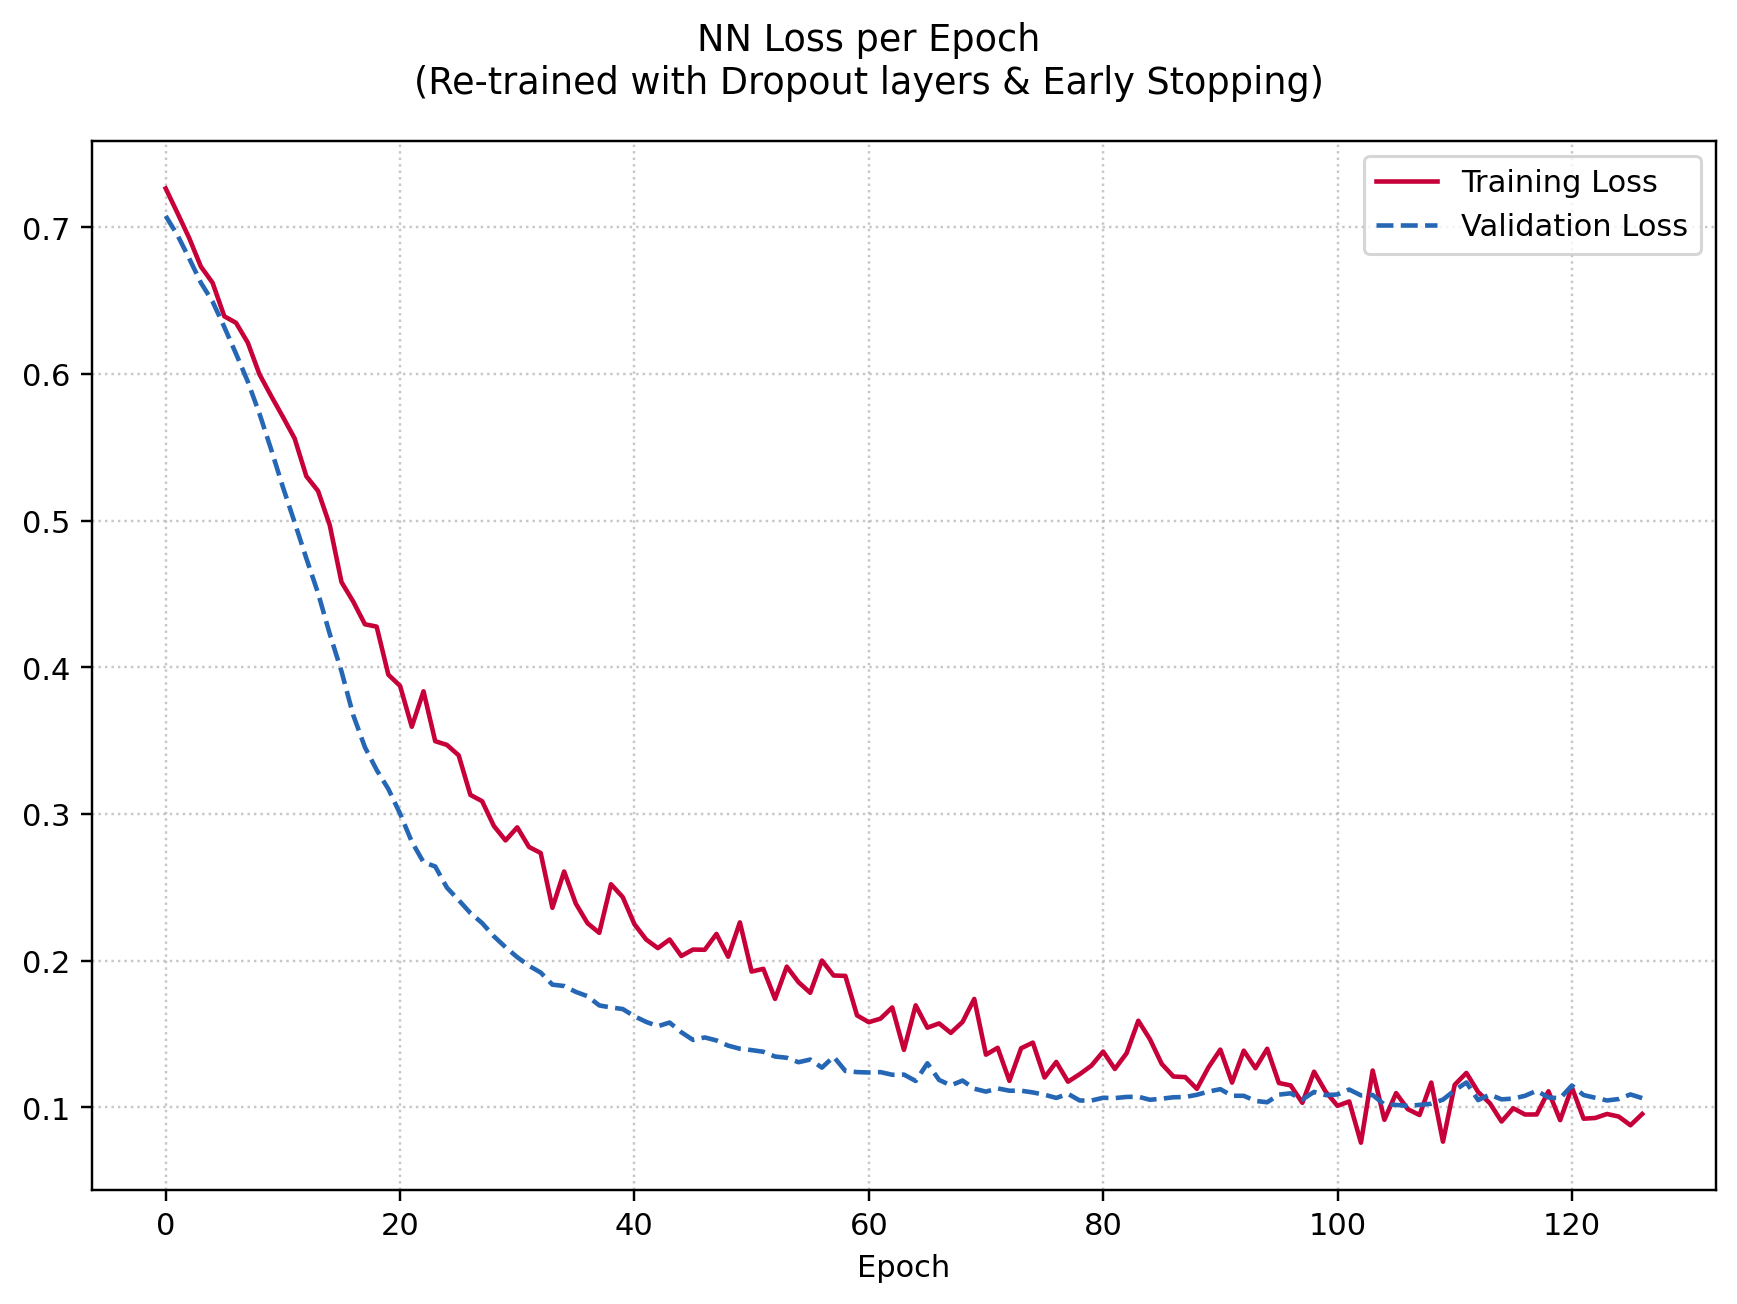

In [52]:
# plot loss history of re-trained model

fig, ax = plt.subplots(figsize=(8,6), dpi=220)

xVals = model.history.epoch # array of all epochs

# loss
ax.plot(xVals, loss_early_drop, color="#C70039", label="Training Loss")
# validation loss
ax.plot(xVals, val_loss_early_drop, color="#2566B5",
        label="Validation Loss", linestyle="--")

ax.legend(loc="best")
ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

ax.ticklabel_format(axis="both", style="plain")
ax.set_xlabel("Epoch")
fig.suptitle("NN Loss per Epoch\n(Re-trained with Dropout layers & Early Stopping)")
fig.tight_layout();

### Observation
1. Both **Training & Validation loss** are **reducing** and **flattening out** together
    - indicates that model is performing well and is likely to **generalize well** on new unseen data
    - _unlike previous cases_ validation loss is neither increasing, nor is far away from training loss
    
---


# Comparison Plots for all the above Training routines

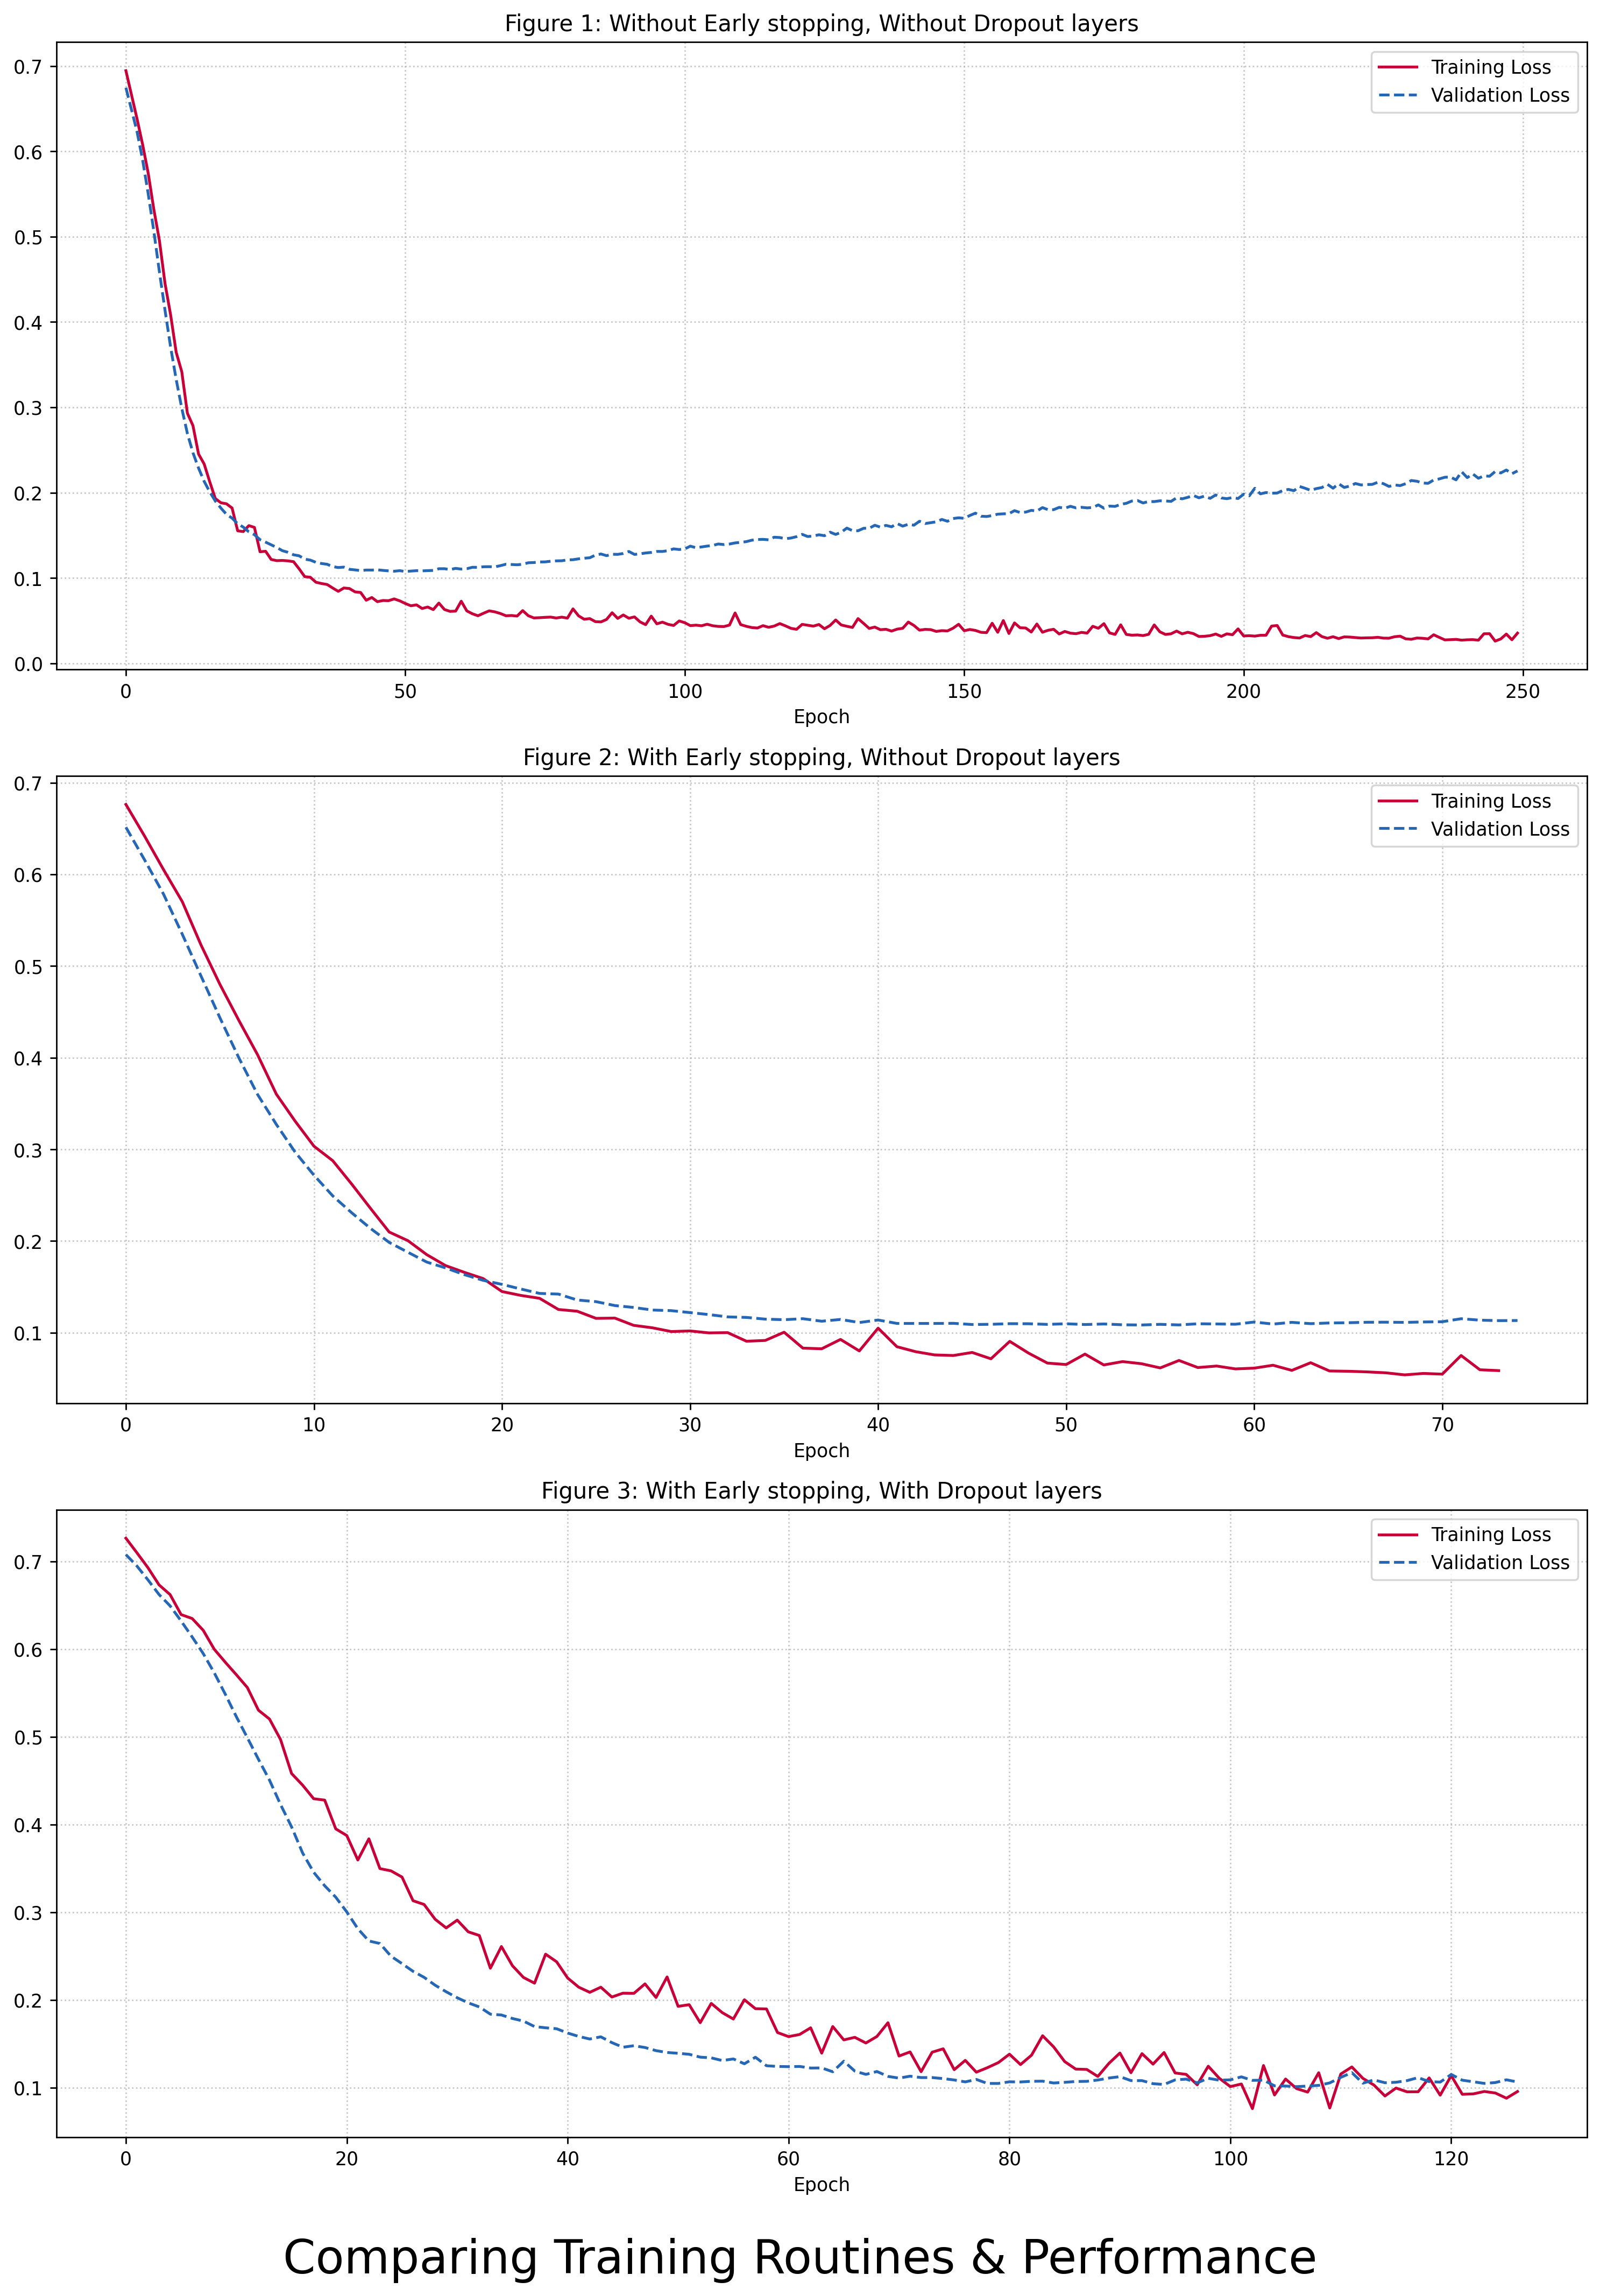

In [71]:
fig, ax = plt.subplots (nrows=3, ncols=1,
                        figsize=(12,17), dpi=250)

ax1, ax2, ax3 = ax



# routine 1
# loss
xVals1 = np.arange(len(loss))
ax1.plot(xVals1, loss, color="#C70039", label="Training Loss")
# validation loss
ax1.plot(xVals, val_loss, color="#2566B5",
        label="Validation Loss", linestyle="--")
ax1.set_title("Figure 1: Without Early stopping, Without Dropout layers")
ax1.legend(loc="best")
ax1.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax1.ticklabel_format(axis="both", style="plain")
ax1.set_xlabel("Epoch")

# routine 2
# loss
xVals2 = np.arange(len(loss_early))
ax2.plot(xVals2, loss_early, color="#C70039", label="Training Loss")
# validation loss
ax2.plot(xVals2, val_loss_early, color="#2566B5",
        label="Validation Loss", linestyle="--")
ax2.set_title("Figure 2: With Early stopping, Without Dropout layers")
ax2.legend(loc="best")
ax2.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax2.ticklabel_format(axis="both", style="plain")
ax2.set_xlabel("Epoch")

# routine 3
# loss
xVals3 = np.arange(len(loss_early_drop))
ax3.plot(xVals3, loss_early_drop, color="#C70039", label="Training Loss")
# validation loss
ax3.plot(xVals3, val_loss_early_drop, color="#2566B5",
        label="Validation Loss", linestyle="--")
ax3.set_title("Figure 3: With Early stopping, With Dropout layers")
ax3.legend(loc="best")
ax3.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax3.ticklabel_format(axis="both", style="plain")
ax3.set_xlabel("Epoch")

fig.suptitle("Comparing Training Routines & Performance", fontsize=25,
            y=-0.01)
fig.tight_layout();

### Observation
>_The three plots show how **performance improved gradually** as we made incremental modifications with each tuning iteration-\
1st we added **Early stopping** criterias and then the **Dropout layers** to make the NN model more robust._

>_By the end, as visible from the **bottom-most plot** (Figure 3) above,\
both **training loss** and **validation loss** started **converging** signifying that NN model may generalize well to new unseen data.\
Further, such a trend of both losses signify that training **did not overfit** either as was the case with our initial training routine (Figure 1)._

>_Now it's time to evaluate how accurately the NN model makes predictions on previously unseen data (Ex. the Test set)._

# Making Predictions with trained NN Model

## Final Model

In [73]:
# create the sequential NN model again

# base Sequential model
model_final = Sequential()

# building the NN architecture one layer at a time

# input layer
model_final.add(Dense(units=30, activation="relu",
                input_shape=input_shape, name="layer1"))
# add dropout layer for input layer ("layer1")
# turn-off 50% of the neurons during each batch of training (in each epoch)
model_final.add(Dropout(rate=0.5)) 

# hidden layers
model_final.add(Dense(units=15, activation="relu", name="layer2"))
# add dropout layer for hidden layer ("layer2")
# turn-off 50% of the neurons during each batch of training (in each epoch)
model_final.add(Dropout(rate=0.5)) 

# output layer (sigmoid activation for binary classification)
model_final.add(Dense(units=1, activation="sigmoid", name="layer3"))

In [74]:
# compiling the model
model_final.compile(loss="binary_crossentropy", optimizer="adam")

In [75]:
# define early stopping criterias

early_stop_final = EarlyStopping(monitor="val_loss", mode="min",
                          patience=20, verbose=1)

In [76]:
# fit model

# passing in the early stopping object inside a list
model_final.fit(x=X_train_scaled, y=y_train, epochs=250,
         validation_data=(X_test_scaled, y_test),
         callbacks=[early_stop_final])

Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7023 - val_loss: 0.6671
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6795 - val_loss: 0.6519
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6643 - val_loss: 0.6369
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6477 - val_loss: 0.6179
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6317 - val_loss: 0.5971
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6194 - val_loss: 0.5760
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5929 - val_loss: 0.5536
Epoch 8/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5718 - val_loss: 0.5280
Epoch 9/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5718 - val_loss: 0.5064
Epoch 10/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5309 - val_loss: 0.4790
Epoch 11/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5359 - val_loss: 0.4550
Epoch 12/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [78]:
# get loss history dataframe
losses_history_final = pd.DataFrame(model_final.history.history)

In [81]:
# get epochs
epochs_final = model_final.history.epoch
# separate losses
loss_final = losses_history_final["loss"]
val_loss_final = losses_history_final["val_loss"]

In [83]:
# make predictions
predictions_final = model_final.predict(x=X_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [86]:
# convert predictions into 1 & 0 format instead of probabilities

threshold = 0.5 # if probability >0.5 then class 1, else class 0

predictions_final_classes = (predictions_final > threshold).astype("int32")

In [90]:
print(f"First 5 predictions:\n{predictions_final_classes[0:5].reshape(-1)}")
print(f"\nFirst 5 actual values:\n{y_test[0:5]}")

First 5 predictions:
[0 1 1 1 1]

First 5 actual values:
[0 1 1 1 1]


## Probing Classification Metrics to Evaluate NN model

In [104]:
# metrics to probe

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#### Accuracy

In [96]:
# accuracy of classification (predictions done on Test set)

accuracy_final = accuracy_score(y_true=y_test, y_pred=predictions_final_classes)

accuracy_final = round(accuracy_final, ndigits=4)

print(f"Overall Accuracy of Binary Classification Model = {accuracy_final}")
print(f"Model could correctly predict {accuracy_final*100}% times (Test Set examples)")

Overall Accuracy of Binary Classification Model = 0.972
Model could correctly predict 97.2% times (Test Set examples)


#### Confusion Matrix

In [98]:
# confusion matrix

cm_final = confusion_matrix(y_true=y_test, y_pred=predictions_final_classes)

Text(0.5, 0.98, 'Confusion Matrix')

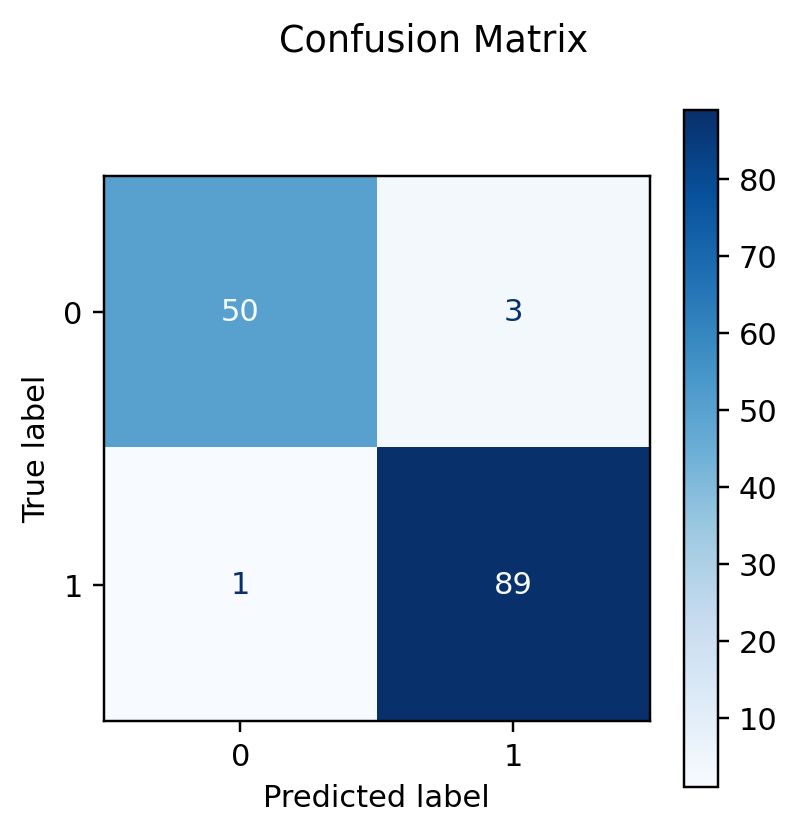

In [100]:
# plot confusion matrix

cm_final_display = ConfusionMatrixDisplay(confusion_matrix=cm_final)

fig, ax = plt.subplots(figsize=(4,4), dpi=220)
cm_final_display.plot(ax=ax, im_kw={"cmap":"Blues"})

fig.suptitle("Confusion Matrix")

#### Classification Report

In [102]:
# classification report

report_final = classification_report(y_true=y_test, y_pred=predictions_final_classes)

print(report_final)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



#### Overall Precision, Recall, F1-score

In [105]:
precision_final = precision_score(y_true=y_test, y_pred=predictions_final_classes)

recall_final = recall_score(y_true=y_test, y_pred=predictions_final_classes)

f1_final = f1_score(y_true=y_test, y_pred=predictions_final_classes)

In [107]:
print(f"Overall Precision: {round(precision_final, ndigits=4)}")
print(f"Overall Recall: {round(recall_final, ndigits=4)}")
print(f"Overall F1 Score: {round(f1_final, ndigits=4)}")

Overall Precision: 0.9674
Overall Recall: 0.9889
Overall F1 Score: 0.978


In [136]:
# dataframe of metrics
vals = [round(precision_final, ndigits=4),
       round(recall_final, ndigits=4),
       round(f1_final, ndigits=4)]

cols = ["Precision", "Recall", "F1-score"]

df_metrics = pd.DataFrame(data=[vals], columns=cols)

df_metrics["Accuracy"] = accuracy_final

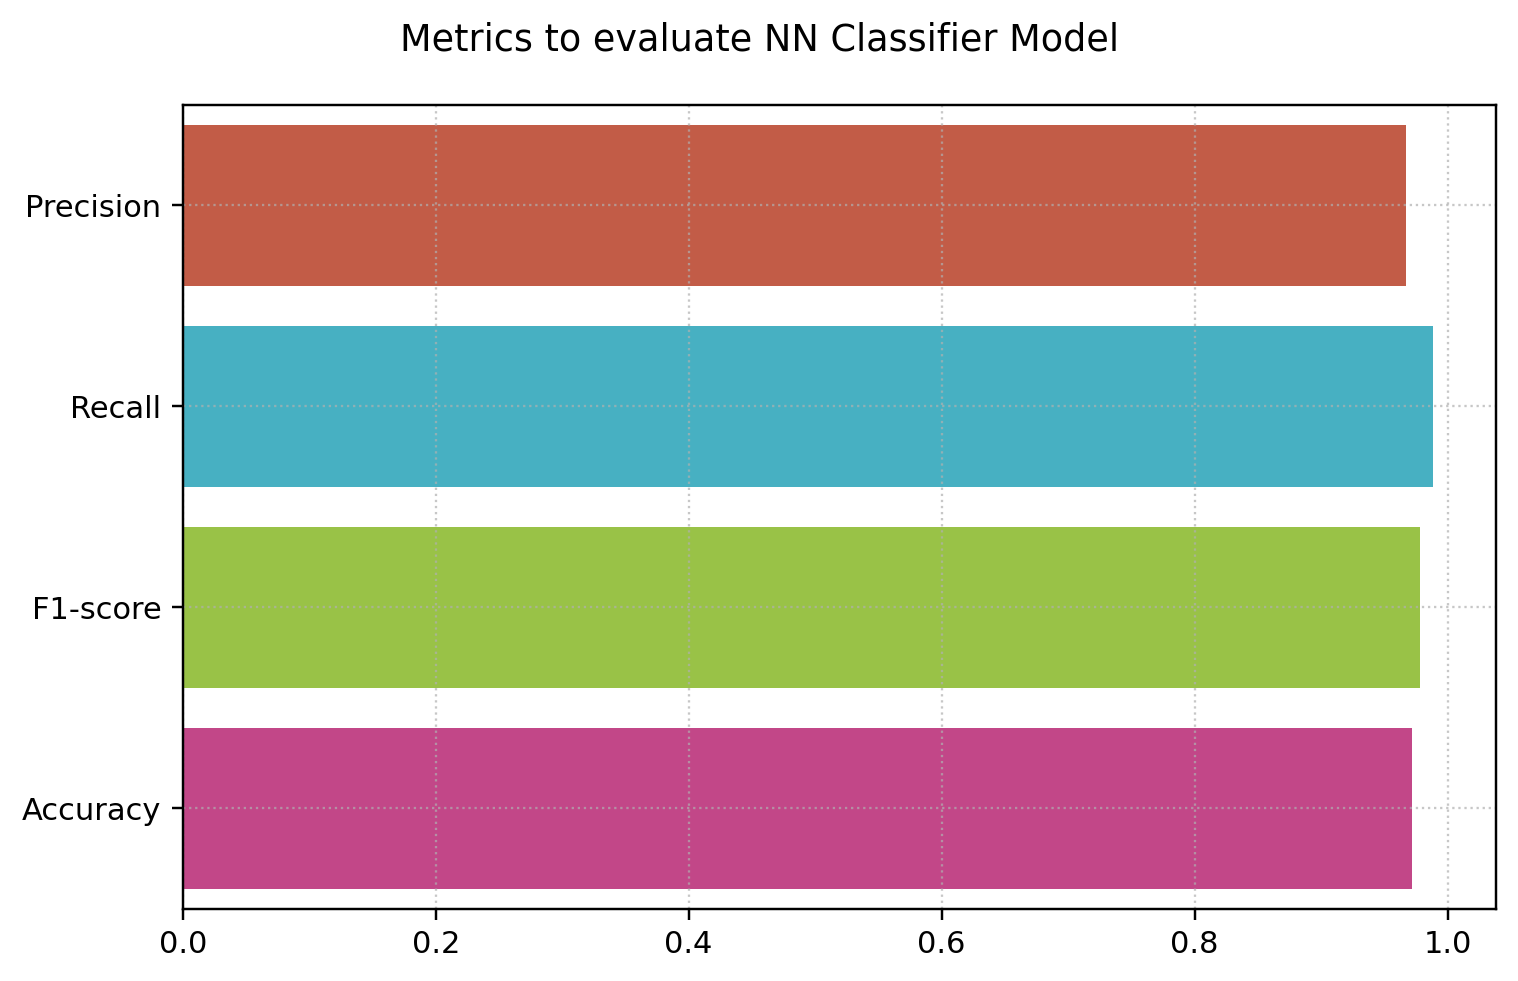

In [143]:
# visualizing metrics

fig, ax = plt.subplots(figsize=(7,4.5), dpi=220)

colors = {"Precision":"#D74F32", "Recall":"#32BED7",
          "F1-score":"#A0D732", "Accuracy":"#D73289"}

sns.barplot(data=df_metrics, ax=ax,
           orient="h", palette=colors)

ax.grid(linestyle=":", linewidth=0.75, alpha=0.7)

fig.suptitle("Metrics to evaluate NN Classifier Model")

fig.tight_layout();

## Understanding the Metrics- _Did the NN Classifier perform well?_

1. **`Precision = 0.9674`**
    - Of all cases when NN Model **predicted `y = 1`, $96.75\%$ times** it was **actually `y = 1`**
---
2. **`Recall = 0.9889`**
    - Of all cases when it was **actually `y = 1`**, NN Model **predicted `y = 1` $98.89\%$ times**
    
### High Precision v/s High Recall- _What do we want? _
>_If a model has **high precision** it means if the model predicts that patient has a disease, or in this case, tumor is malignant then **probably the tumor is indeed malignant**.\
If a model **high recall** it means if the tumor is actually malignant, then model will predict (correctly) / **correctly identify it to be malignant** most of the times._

So, the question is which of the two do we want? This question arises because there is a **trade-off** underlying the two.

>_If **precision is increased** then **recall reduces** for the model and vice-versa._

In this project we are dealing with **classifying tumors** to help diagnosis of **breast cancer**.

>_In 2020, there were **2.3 million women** diagnosed with breast cancer and **685 000 deaths** globally._
>_As of the end of 2020, there were **7.8 million women** alive who were diagnosed with breast cancer in the past 5 years, making it the **world’s most prevalent cancer**.- World Health Organization_


Given that **early detection** can save the patient if s/he receives medical attention on time we would want the NN model to have **higher Recall** $\rightarrow$ _i.e. If patient actually has breast cancer, then model predicts tumor to be malignant most of the times._

>_Breast cancer mortality changed little from the 1930s through to the 1970s when surgery alone was the primary mode of treatment (radical mastectomy). **Improvements in survival** began in the 1990s when countries established breast cancer **early detection programmes** that were linked to **comprehensive treatment programs** including effective medical therapies. - World Health Organization_

# Conclusion

The NN model has **`Recall = 0.9889`** which is quite good.\
With **gradual incremental modifications** to the **NN architecture** (`Dropout layers`) and **training routine** (`Early stopping`) the model's performance improved and reached a stage where it can **generalize** well into newer unseen data.

---